**<center><h1>EXPLORATORY DATA ANALYSIS</h1></center>**

**<center>Focussing on Primary, Secondary and Critical Questions</center>**

**DATA LOADING**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Don't wrap columns
pd.set_option('display.max_colwidth', None)  # Show full content in each cell

In [2]:
df_aqi = pd.read_csv("datasets/aqi.csv", encoding = "latin1")
df_vahan = pd.read_csv("datasets/vahan.csv", encoding = "latin1")
df_idsp = pd.read_csv("datasets/idsp.csv", encoding = "latin1")
df_population_projection = pd.read_csv("datasets/population_projection.csv", encoding = "latin1")

**DATA INSPECTION**

In [3]:
print("\033[1m1. aqi\033[0m")
print("Shape:",df_aqi.shape,"\n","Columns:",df_aqi.columns)

print("\n\033[1m2. vahan\033[0m")
print("Shape:",df_vahan.shape,"\n","Columns:",df_vahan.columns)

print("\n\033[1m3. idsp\033[0m")
print("Shape:",df_idsp.shape,"\n","Columns:",df_idsp.columns)

print("\n\033[1m4. population projection\033[0m")
print("Shape:",df_population_projection.shape,"\n","Columns:",df_population_projection.columns)

1. aqi
Shape: (235785, 9) 
 Columns: Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')

2. vahan
Shape: (64841, 9) 
 Columns: Index(['year', 'month', 'state', 'rto', 'vehicle_class', 'fuel', 'value',
       'unit', 'note'],
      dtype='object')

3. idsp
Shape: (6474, 12) 
 Columns: Index(['year', 'week', 'outbreak_starting_date', 'reporting_date', 'state',
       'district', 'disease_illness_name', 'status', 'cases', 'deaths', 'unit',
       'note'],
      dtype='object')

4. population projection
Shape: (8892, 7) 
 Columns: Index(['year', 'month', 'state', 'gender', 'value', 'unit', 'note'], dtype='object')


In [4]:
print("\033[1mSample records of aqi\033[0m\n")
df_aqi.sample(5)

Sample records of aqi



date          state            area  \
231076  02-05-2022      Karnataka  Chamarajanagar   
212149  05-09-2022  Uttar Pradesh          Meerut   
181305  01-03-2023     Tamil Nadu        Ariyalur   
115905  28-12-2023    Maharashtra        Kolhapur   
151379  25-07-2023      Karnataka        Madikeri   

        number_of_monitoring_stations prominent_pollutants  aqi_value  \
231076                              1                 PM10         42   
212149                              3                 PM10        117   
181305                              1                   CO        120   
115905                              2             PM2.5,O3        206   
151379                              1                PM2.5         23   

       air_quality_status  \
231076               Good   
212149           Moderate   
181305           Moderate   
115905               Poor   
151379               Good   

                                                                          unit  \
231076  number_of_monitoring_stations in Absolute Number, aqi_value in Indices   
212149  number_of_monitoring_stations in Absolute Number, aqi_value in Indices   
181305  number_of_monitoring_stations in Absolute Number, aqi_value in Indices   
115905  number_of_monitoring_stations in Absolute Number, aqi_value in Indices   
151379  number_of_monitoring_stations in Absolute Number, aqi_value in Indices   

        note  
231076   NaN  
212149   NaN  
181305   NaN  
115905   NaN  
151379   NaN

In [5]:
print("\033[1mSample records of vahan\033[0m\n")
df_vahan.sample(5)

Sample records of vahan



year     month    state                       rto  \
20348  2024      June    Assam  All Vahan Running Office   
20722  2024      June  Gujarat  All Vahan Running Office   
5673   2025  February  Mizoram  All Vahan Running Office   
530    2025     April      Goa  All Vahan Running Office   
12785  2024   October    Delhi  All Vahan Running Office   

                  vehicle_class            fuel  value  \
20348   VEHICLE FITTED WITH RIG          DIESEL      1   
20722  THREE WHEELER (PERSONAL)        CNG ONLY      1   
5673            M-CYCLE/SCOOTER         ETHANOL      6   
530             M-CYCLE/SCOOTER  PETROL/ETHANOL    665   
12785                 AMBULANCE          PETROL      4   

                           unit  note  
20348  value in Absolute Number   NaN  
20722  value in Absolute Number   NaN  
5673   value in Absolute Number   NaN  
530    value in Absolute Number   NaN  
12785  value in Absolute Number   NaN

In [6]:
print("\033[1mSample records of idsp\033[0m\n")
df_idsp.sample(5)

Sample records of idsp



year  week outbreak_starting_date reporting_date              state  \
4835  2023    28             15-07-2023     15-07-2023      Uttar Pradesh   
59    2025    15             13-04-2025     13-04-2025     Madhya Pradesh   
4441  2023    35             27-08-2023     29-08-2023     Madhya Pradesh   
5515  2023     2             21-02-2023     26-02-2023        Uttarakhand   
4614  2023    32             11-08-2023     11-08-2023  Jammu and Kashmir   

         district     disease_illness_name                 status  cases  \
4835     Fatehpur  Acute Diarrheal Disease  Reported in Same Week     23   
59         Niwari               Chickenpox               Reported      5   
4441   Ashoknagar          Fever with Rash  Reported in Same Week      7   
5515  Pithoragarh              Hepatitis A  Reported in Same Week     56   
4614      Kupwara               Chickenpox  Reported in Same Week     29   

      deaths                                                 unit note  
4835       0  cases in absolute number, deaths in absolute number  NaN  
59         0  cases in absolute number, deaths in absolute number  NaN  
4441       0  cases in absolute number, deaths in absolute number  NaN  
5515       0  cases in absolute number, deaths in absolute number  NaN  
4614       0  cases in absolute number, deaths in absolute number  NaN

In [7]:
print("\033[1mSample records of population projection\033[0m\n")
df_population_projection.sample(5)

Sample records of population projection



year    month              state  gender  value                unit  \
7339  2015    March            Manipur    Male    446  value in Thousands   
4399  2024     July  Jammu and Kashmir    Male   2297  value in Thousands   
8018  2013    March            Mizoram  Female    295  value in Thousands   
7889  2013  October          Rajasthan  Female   8622  value in Thousands   
3212  2027    March             Sikkim  Female    195  value in Thousands   

      note  
7339   NaN  
4399   NaN  
8018   NaN  
7889   NaN  
3212   NaN

In [8]:
df_aqi.state = df_aqi.state.replace({
    'Madhya':'Madhya Pradesh',
    'Tamil nadu':'Tamil Nadu',
    'Uttar':'Uttar Pradesh',
    'Arunachal':'Arunachal Pradesh',
    'Dadra and Nagar Haveli and Daman and Diu':'Dadra and Nagar Haveli'
})

df_vahan.state = df_vahan.state.replace({
    'Madhya':'Madhya Pradesh',
    'Tamil nadu':'Tamil Nadu',
    'Uttar':'Uttar Pradesh',
    'Arunachal':'Arunachal Pradesh',
    'Dadra and Nagar Haveli and Daman and Diu':'Dadra and Nagar Haveli'
})

df_idsp.state = df_idsp.state.replace({
    'Madhya':'Madhya Pradesh',
    'Tamil nadu':'Tamil Nadu',
    'Uttar':'Uttar Pradesh',
    'Arunachal':'Arunachal Pradesh',
    'Dadra and Nagar Haveli and Daman and Diu':'Dadra and Nagar Haveli'
})

df_population_projection.state = df_population_projection.state.replace({
    'Madhya':'Madhya Pradesh',
    'Tamil nadu':'Tamil Nadu',
    'Uttar':'Uttar Pradesh',
    'Arunachal':'Arunachal Pradesh',
    'Dadra and Nagar Haveli and Daman and Diu':'Dadra and Nagar Haveli'
})

In [9]:
# Errors showing in these records as observed only in Power BI; imputing these into those from here
df_idsp.iloc[[1288,1799,1851]]

year  week outbreak_starting_date reporting_date           state  \
1288  2024    40             27-09-2024     03-10-2024          Kerala   
1799  2024    32             10-08-2024     11-08-2024  Madhya Pradesh   
1851  2024    32             06-08-2024     07-08-2024      Tamil Nadu   

      district     disease_illness_name                 status  cases  deaths  \
1288  Thrissur                    Mumps  Reported in Same Week     18       0   
1799      Guna  Acute Diarrheal Disease  Reported in Same Week     23       0   
1851  Dindigul                    Mumps  Reported in Same Week     26       0   

                                                     unit note  
1288  cases in absolute number, deaths in absolute number  NaN  
1799  cases in absolute number, deaths in absolute number  NaN  
1851  cases in absolute number, deaths in absolute number  NaN

**<center>PRIMARY ANALYSIS</center>**

**1. List the top 5 and bottom 5 areas with highest average AQI. (Consider areas
which contains data from last 6 months: December 2024 to May 2025)**

In [10]:
df_aqi['date'] = pd.to_datetime(df_aqi['date'])

In [11]:
df_aqi_last6 = df_aqi[(df_aqi['date'] >= "01-12-2024") & (df_aqi['date'] <= "31-05-2025")]

In [12]:
print("\033[1mTop 5 areas by AQI\033[0m\n")
df_aqi_last6.groupby('area')['aqi_value'].mean().round(2).sort_values(ascending=False).head(5)

Top 5 areas by AQI



area
Byrnihat          232.14
Delhi             209.92
Sri Ganganagar    198.59
Greater Noida     193.15
Gurugram          189.87
Name: aqi_value, dtype: float64

In [13]:
print("\033[1mBottom 5 areas by AQI\033[0m\n")
df_aqi_last6.groupby('area')['aqi_value'].mean().round(2).sort_values(ascending=True).head(5)

Bottom 5 areas by AQI



area
Tirunelveli       32.11
Madikeri          37.48
Palkalaiperur     37.49
Ramanathapuram    42.86
Chamarajanagar    44.71
Name: aqi_value, dtype: float64

**2. List out top 2 and bottom 2 prominent pollutants for each state of southern India.
(Consider data post covid: 2022 onwards)**

In [14]:
southern_states = [
    'Kerala',
    'Karnataka',
    'Tamil Nadu',
    'Andhra Pradesh',
    'Telangana',
    'Puducherry',
    'Andaman and Nicobar Islands'
]

In [15]:
df_aqi_south = df_aqi[df_aqi['state'].isin(southern_states)]

In [16]:
df_aqi_post22_south = df_aqi_south[df_aqi_south['date'] > "31-12-2021"]

In [17]:
print("\033[1mTop 2 prominent pollutants for each southern state\033[0m")
grouped_state_poll = df_aqi_post22_south[['prominent_pollutants','state']].groupby('state')

for i in southern_states:
    print(f"\n\033[1m{i}\033[0m\n")
    print(grouped_state_poll.get_group(i)['prominent_pollutants'].value_counts().head(2))

print("\n\033[1mBottom 2 prominent pollutants for each southern state\033[0m")

for i in southern_states:
    print(f"\n\033[1m{i}\033[0m\n")
    print(grouped_state_poll.get_group(i)['prominent_pollutants'].value_counts().tail(2))

Top 2 prominent pollutants for each southern state

Kerala

prominent_pollutants
PM10     3167
PM2.5    1123
Name: count, dtype: int64

Karnataka

prominent_pollutants
PM10    13404
CO       2913
Name: count, dtype: int64

Tamil Nadu

prominent_pollutants
PM10     6253
PM2.5    2268
Name: count, dtype: int64

Andhra Pradesh

prominent_pollutants
PM10     3182
PM2.5    1757
Name: count, dtype: int64

Telangana

prominent_pollutants
PM2.5,PM10    343
PM10          315
Name: count, dtype: int64

Puducherry

prominent_pollutants
PM10    413
O3      303
Name: count, dtype: int64

Andaman and Nicobar Islands

prominent_pollutants
PM10    36
CO      10
Name: count, dtype: int64

Bottom 2 prominent pollutants for each southern state

Kerala

prominent_pollutants
SO2      7
CO,O3    6
Name: count, dtype: int64

Karnataka

prominent_pollutants
PM10,PM2.5,SO2    1
PM10,NO2,SO3      1
Name: count, dtype: int64

Tamil Nadu

prominent_pollutants
PM2.5,CO,NO2    1
PM2.5,NH3,CO    1
Name: count, dtype

**3. Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi,
Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)?
(Consider data from last 1 year)**

In [18]:
metro_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']
metro_states = ['Delhi', 'Maharashtra', 'Tamil Nadu', 'West Bengal', 'Karnataka', 'Telangana', 'Gujarat']

In [19]:
df_aqi['day'] = df_aqi.date.dt.day_name()

In [20]:
df_aqi['day_type'] = np.where(
    (df_aqi['day'] == 'Saturday') | (df_aqi['day'] == 'Sunday'),
    'Weekend',
    'Weekday'
)

In [21]:
df_aqi_lastyr = df_aqi[(df_aqi.date > '01-01-2025') & (df_aqi.date < '31-12-2025')]

In [22]:
df_aqi_lastyr_metro = df_aqi_lastyr[df_aqi_lastyr['state'].apply(lambda x:x in metro_states)]

In [23]:
def state_to_city(state):
    if state == 'Maharashtra':
        return 'Mumbai | Pune'
    elif state == 'Tamil Nadu':
        return 'Chennai'
    elif state == 'West Bengal':
        return 'Kolkata'
    elif state == 'Karnataka':
        return 'Bengaluru'
    elif state == 'Telangana':
        return 'Hyderabad'
    elif state == 'Gujarat':
        return 'Ahmedabad'
    elif state == 'Delhi':
        return 'Delhi'

In [24]:
df_aqi_lastyr_metro['city'] = df_aqi_lastyr_metro['state'].apply(lambda x: state_to_city(x))

In [25]:
df_aqi_lastyr_metro[['day_type','city','aqi_value']].head()

day_type           city  aqi_value
0   Weekday  Mumbai | Pune         78
7   Weekday        Kolkata         68
10  Weekday      Bengaluru         46
11  Weekday      Ahmedabad        110
13  Weekday        Chennai         51

In [26]:
df_grouped_aqi_lastyr_metro = df_aqi_lastyr_metro.groupby(['city', 'day_type'])['aqi_value'].mean().reset_index()

In [27]:
df_grouped_aqi_lastyr_metro['avg_aqi'] = df_grouped_aqi_lastyr_metro['aqi_value']
df_grouped_aqi_lastyr_metro = df_grouped_aqi_lastyr_metro.drop('aqi_value', axis=1)

In [28]:
df_grouped_aqi_lastyr_metro.head()

city day_type     avg_aqi
0  Ahmedabad  Weekday  107.077710
1  Ahmedabad  Weekend  113.456311
2  Bengaluru  Weekday   69.605230
3  Bengaluru  Weekend   71.728758
4    Chennai  Weekday   69.041225

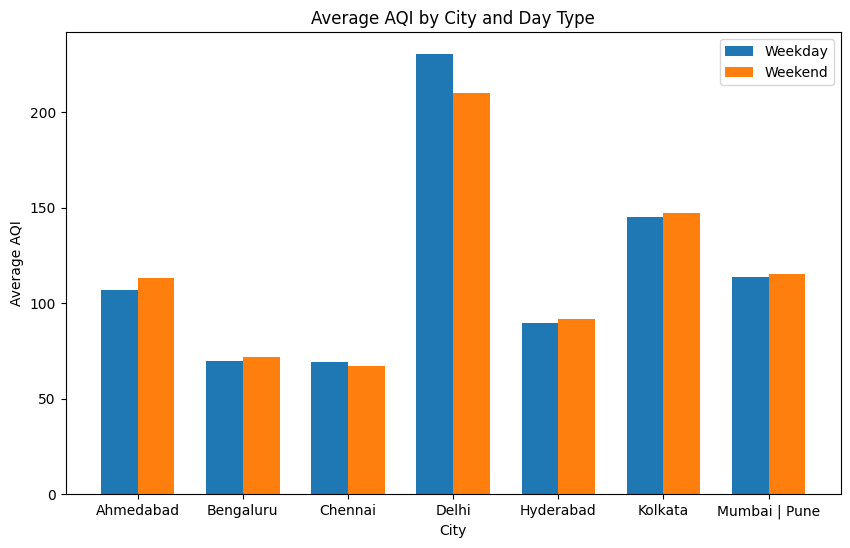

In [29]:
pivot_df = df_grouped_aqi_lastyr_metro.pivot(index='city', columns='day_type', values='avg_aqi')

# X positions for cities
x = np.arange(len(pivot_df.index))
width = 0.35

plt.figure(figsize=(10, 6))

# Plot weekday bars
plt.bar(x - width/2, pivot_df['Weekday'], width, label='Weekday')
# Plot weekend bars
plt.bar(x + width/2, pivot_df['Weekend'], width, label='Weekend')

# Labels and formatting
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Average AQI by City and Day Type')
plt.xticks(x, pivot_df.index)
plt.legend()

plt.show()

*A slight improvement at weekends in Delhi and Chennai can be observed*

*In all other cities, there is a slight deprovement instead.*

**4. Which months consistently show the worst air quality across Indian states — (Consider top 10 states with high distinct areas)**


In [30]:
df_aqi['year'] = df_aqi.date.dt.year

In [31]:
area_counts = []

for i in df_aqi.state.unique():
    area_counts.append(df_aqi[['state','area']][df_aqi.state == i].drop_duplicates().shape[0])

In [32]:
print("\033[1mTop 10 states with high distinct areas\033[0m\n")
top_states = []

for i in df_aqi.state.unique():
    ac = df_aqi[['state','area']][df_aqi.state == i].drop_duplicates().shape[0]
    if ac in sorted(area_counts)[-10:]:
        top_states.append(i)
        print(i,ac)

Top 10 states with high distinct areas

Maharashtra 31
Bihar 25
Madhya Pradesh 15
Odisha 16
Karnataka 27
Tamil Nadu 26
Andhra Pradesh 9
Rajasthan 34
Uttar Pradesh 20
Haryana 25


In [33]:
df_aqi_jan = df_aqi[(df_aqi.date.dt.month == 1) & (df_aqi.state.isin(top_states))]
df_aqi_feb = df_aqi[(df_aqi.date.dt.month == 2) & (df_aqi.state.isin(top_states))]
df_aqi_mar = df_aqi[(df_aqi.date.dt.month == 3) & (df_aqi.state.isin(top_states))]
df_aqi_apr = df_aqi[(df_aqi.date.dt.month == 4) & (df_aqi.state.isin(top_states))]
df_aqi_may = df_aqi[(df_aqi.date.dt.month == 5) & (df_aqi.state.isin(top_states))]
df_aqi_jun = df_aqi[(df_aqi.date.dt.month == 6) & (df_aqi.state.isin(top_states))]
df_aqi_jul = df_aqi[(df_aqi.date.dt.month == 7) & (df_aqi.state.isin(top_states))]
df_aqi_aug = df_aqi[(df_aqi.date.dt.month == 8) & (df_aqi.state.isin(top_states))]
df_aqi_sep = df_aqi[(df_aqi.date.dt.month == 9) & (df_aqi.state.isin(top_states))]
df_aqi_oct = df_aqi[(df_aqi.date.dt.month == 10) & (df_aqi.state.isin(top_states))]
df_aqi_nov = df_aqi[(df_aqi.date.dt.month == 11) & (df_aqi.state.isin(top_states))]
df_aqi_dec = df_aqi[(df_aqi.date.dt.month == 12) & (df_aqi.state.isin(top_states))] 

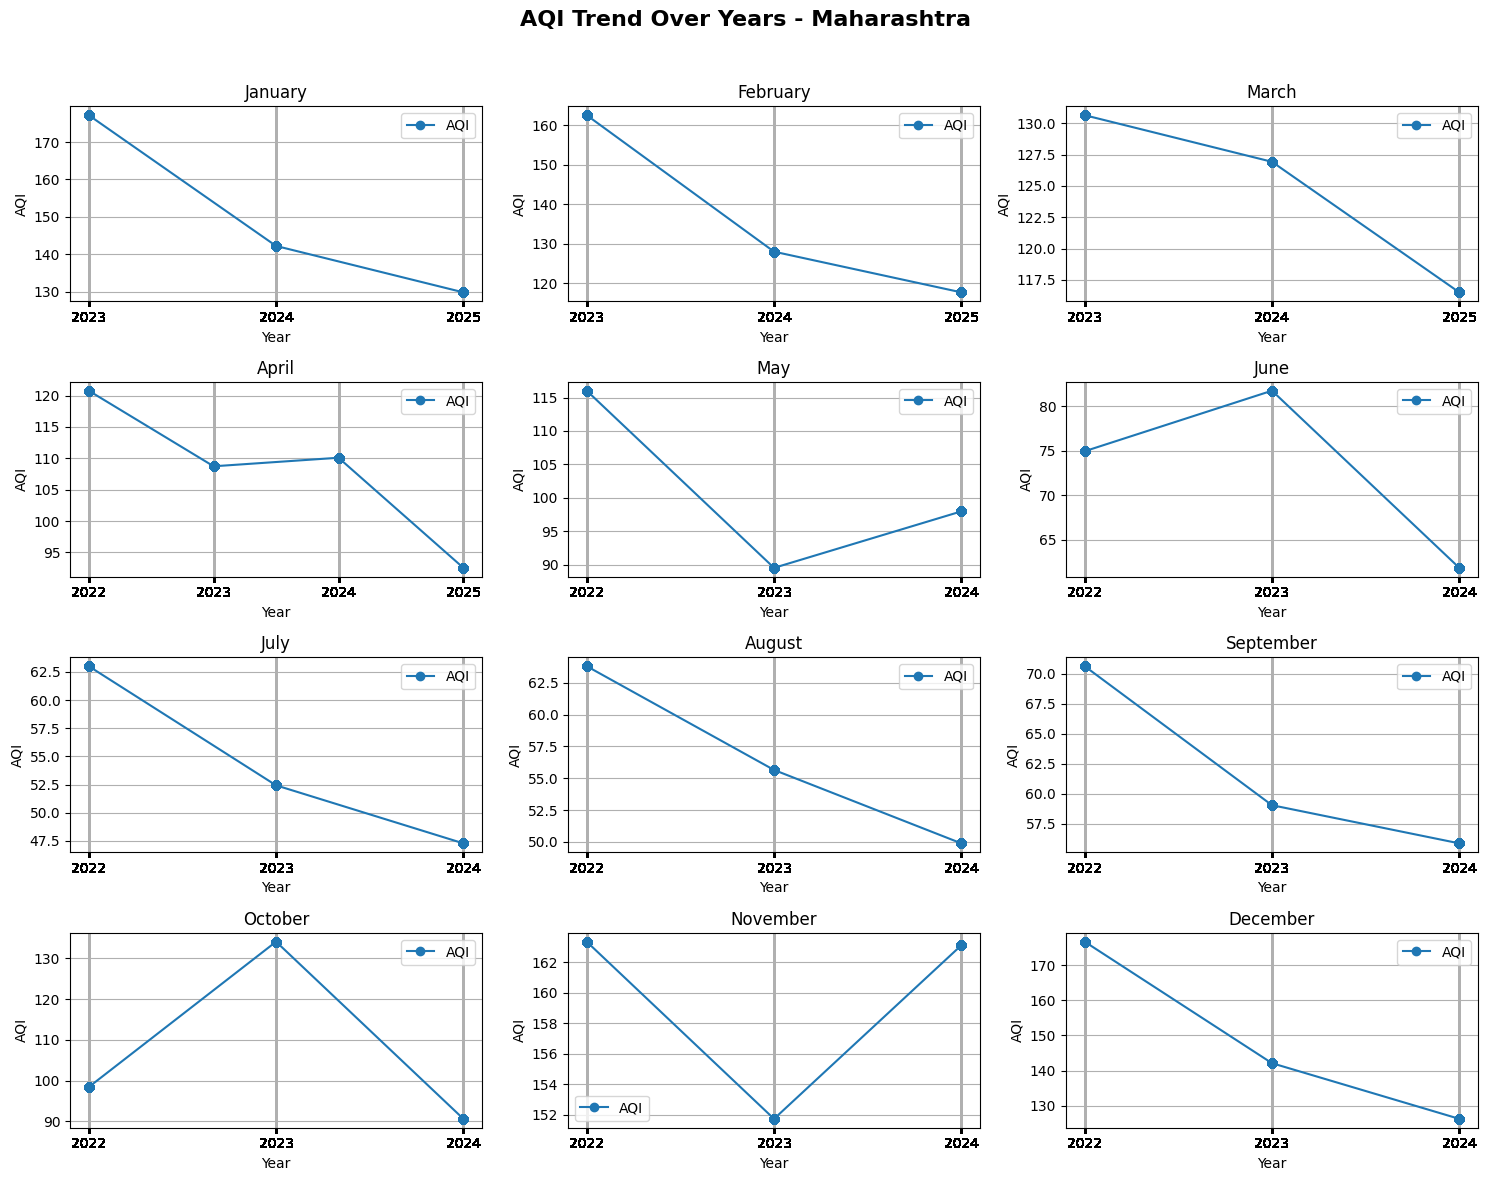

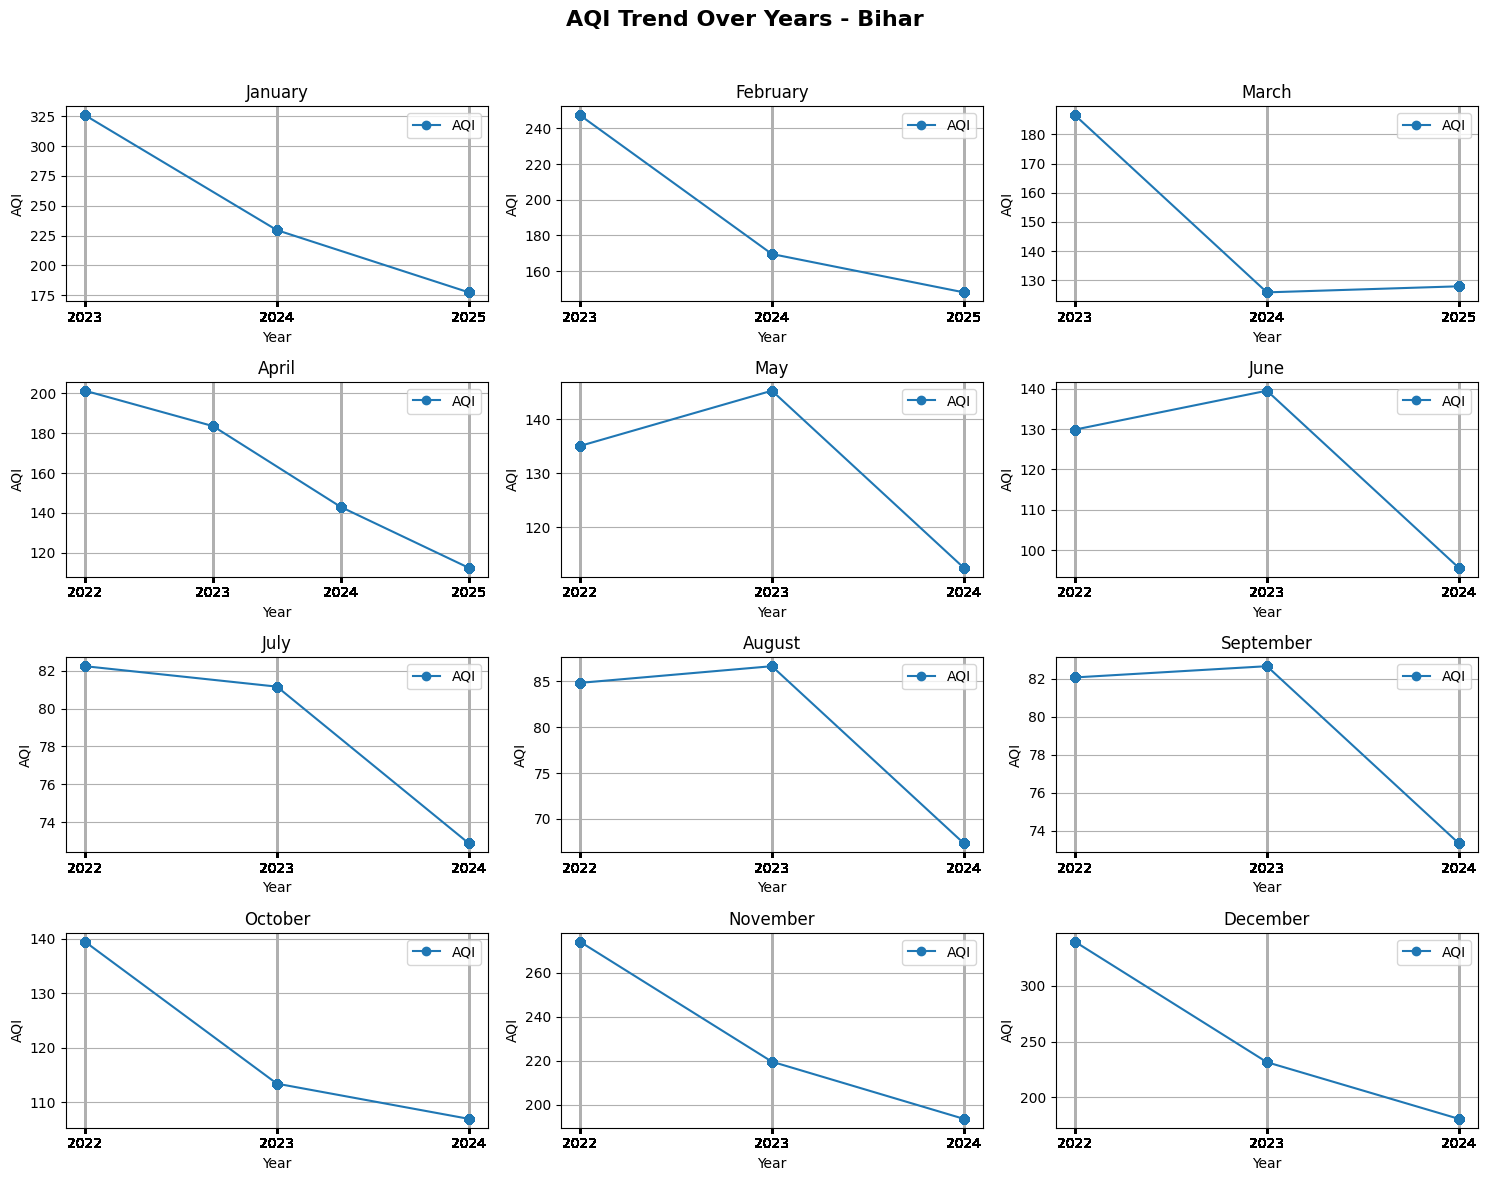

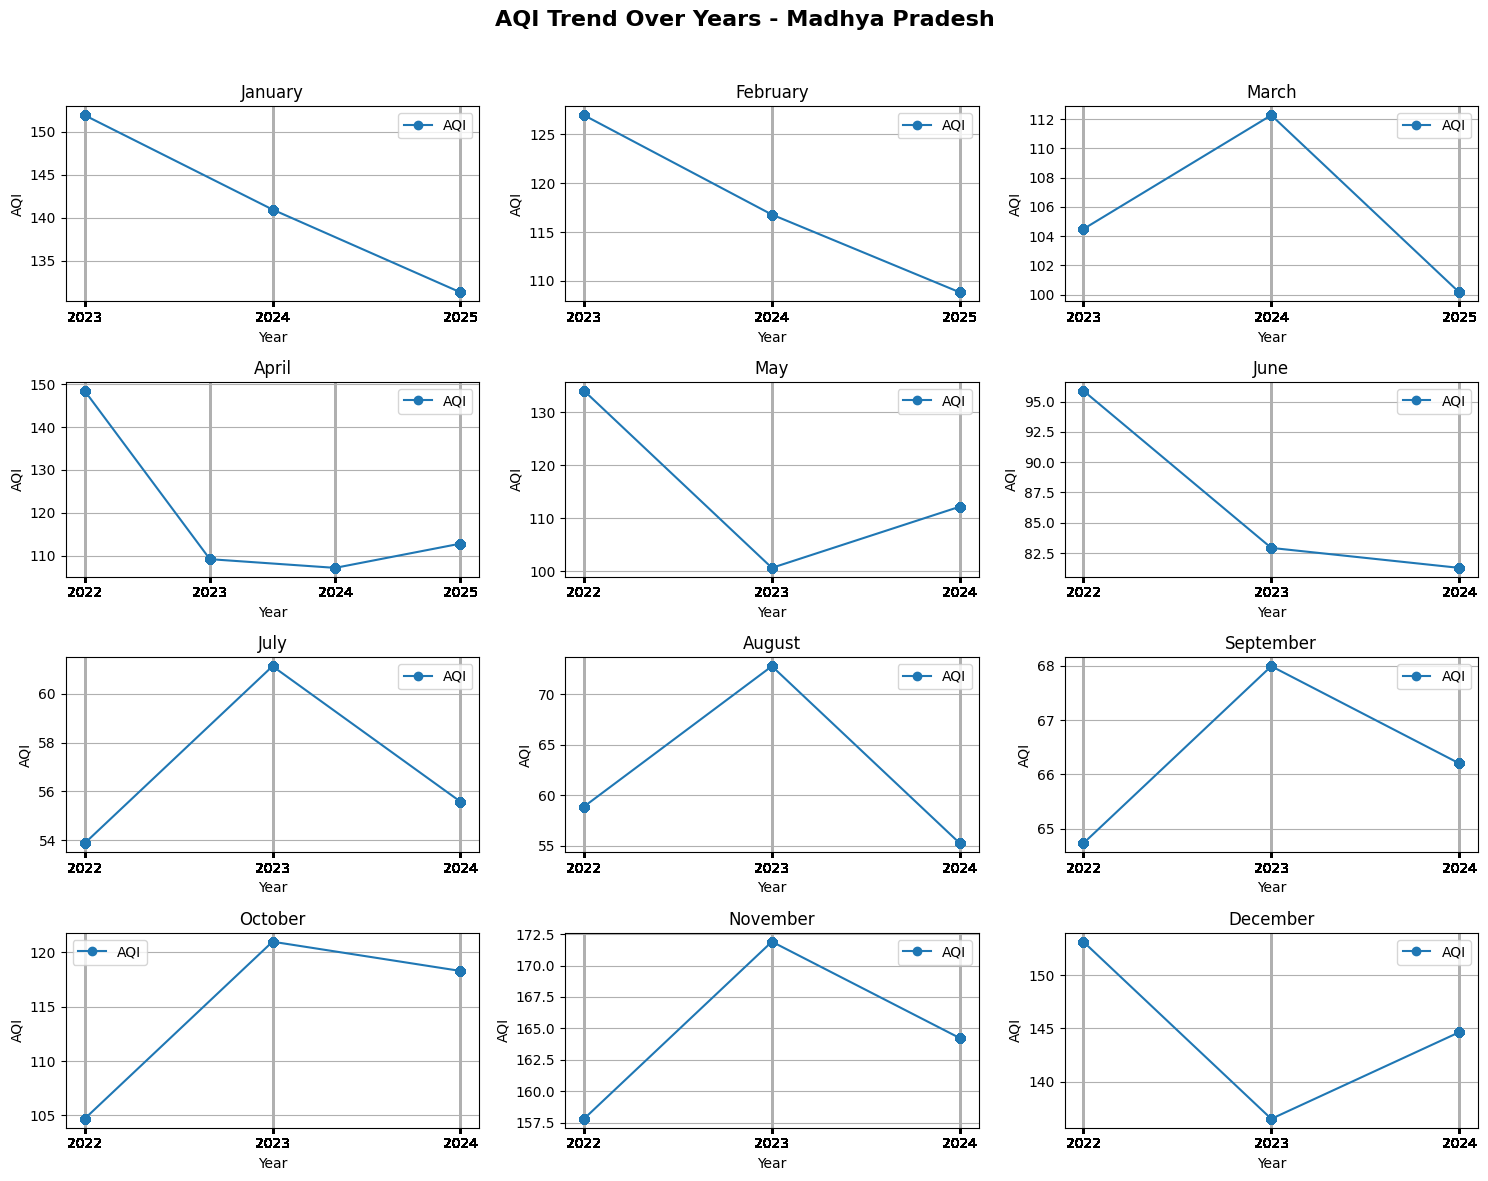

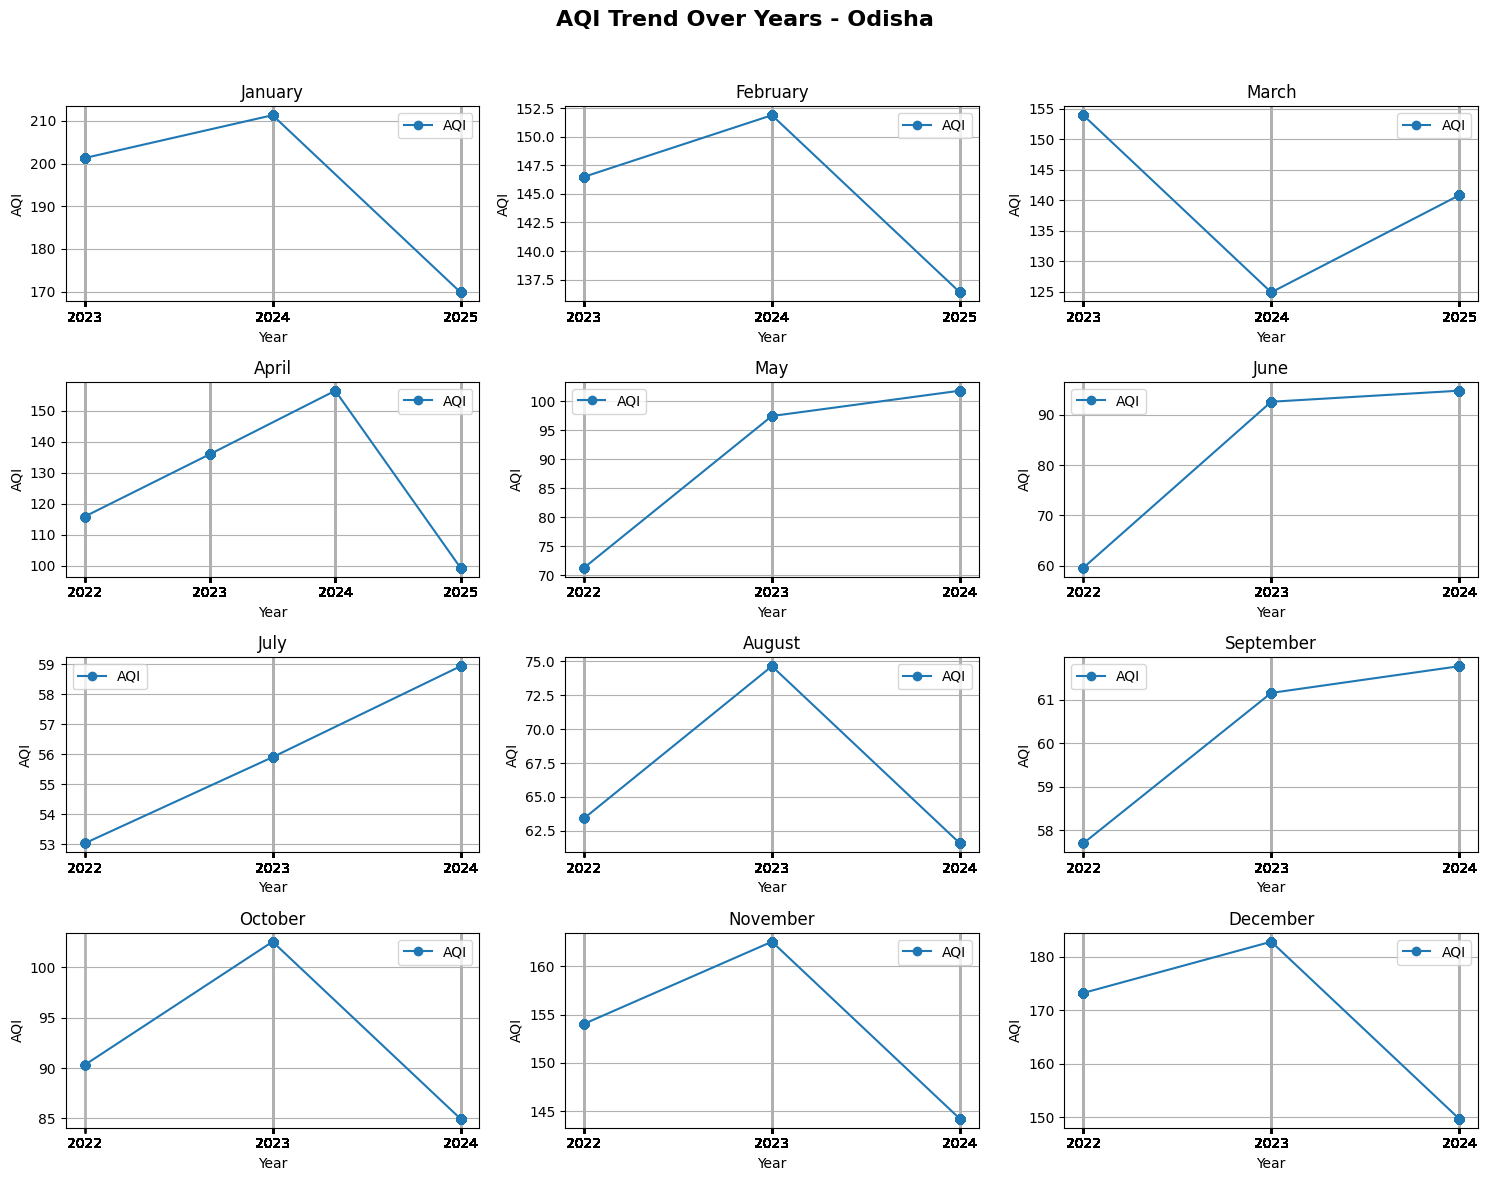

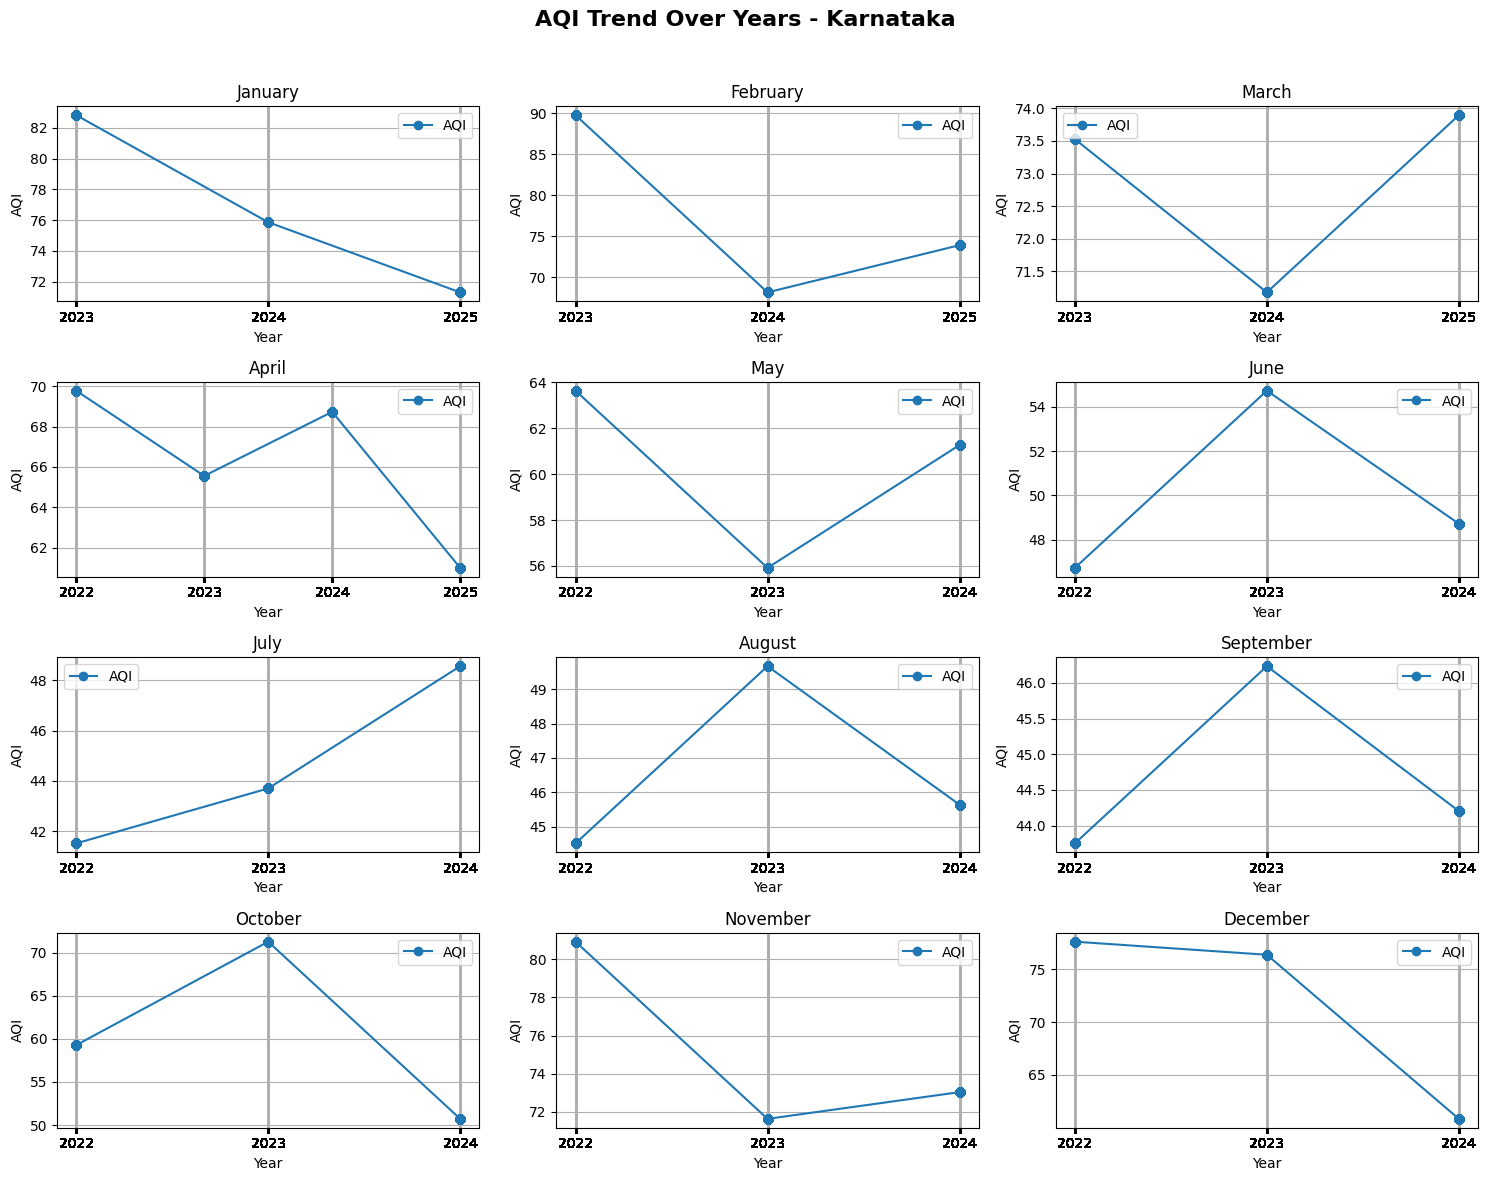

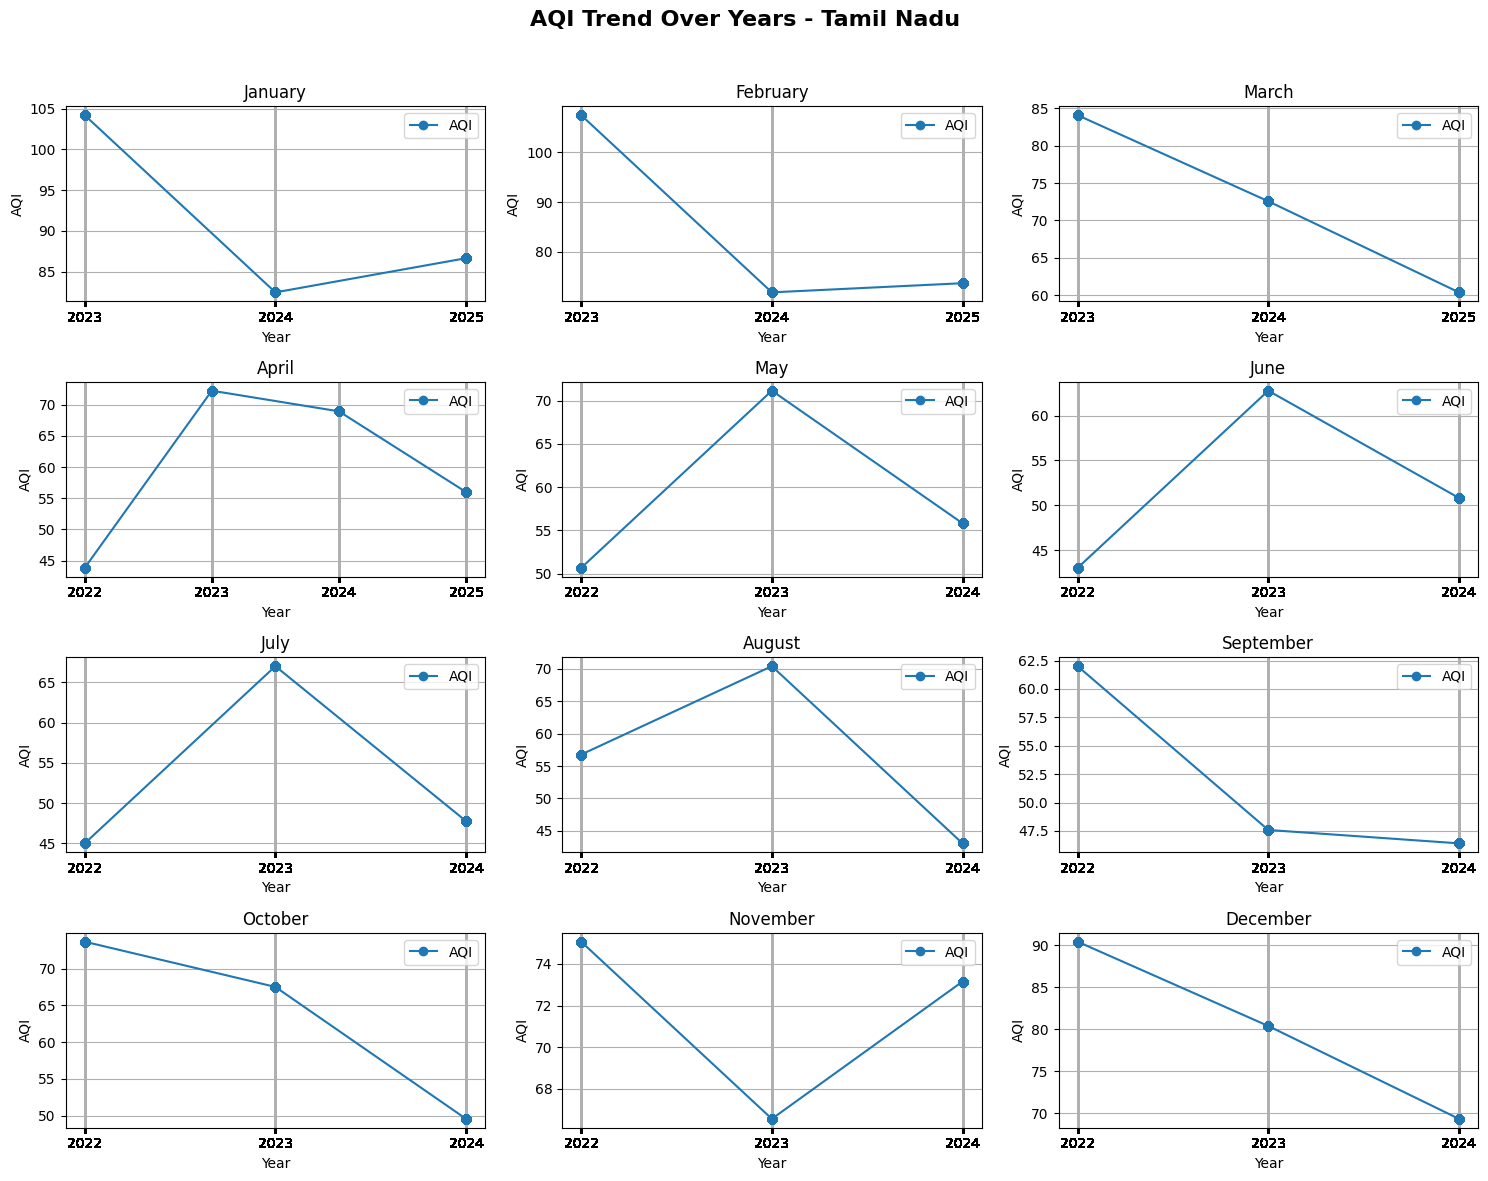

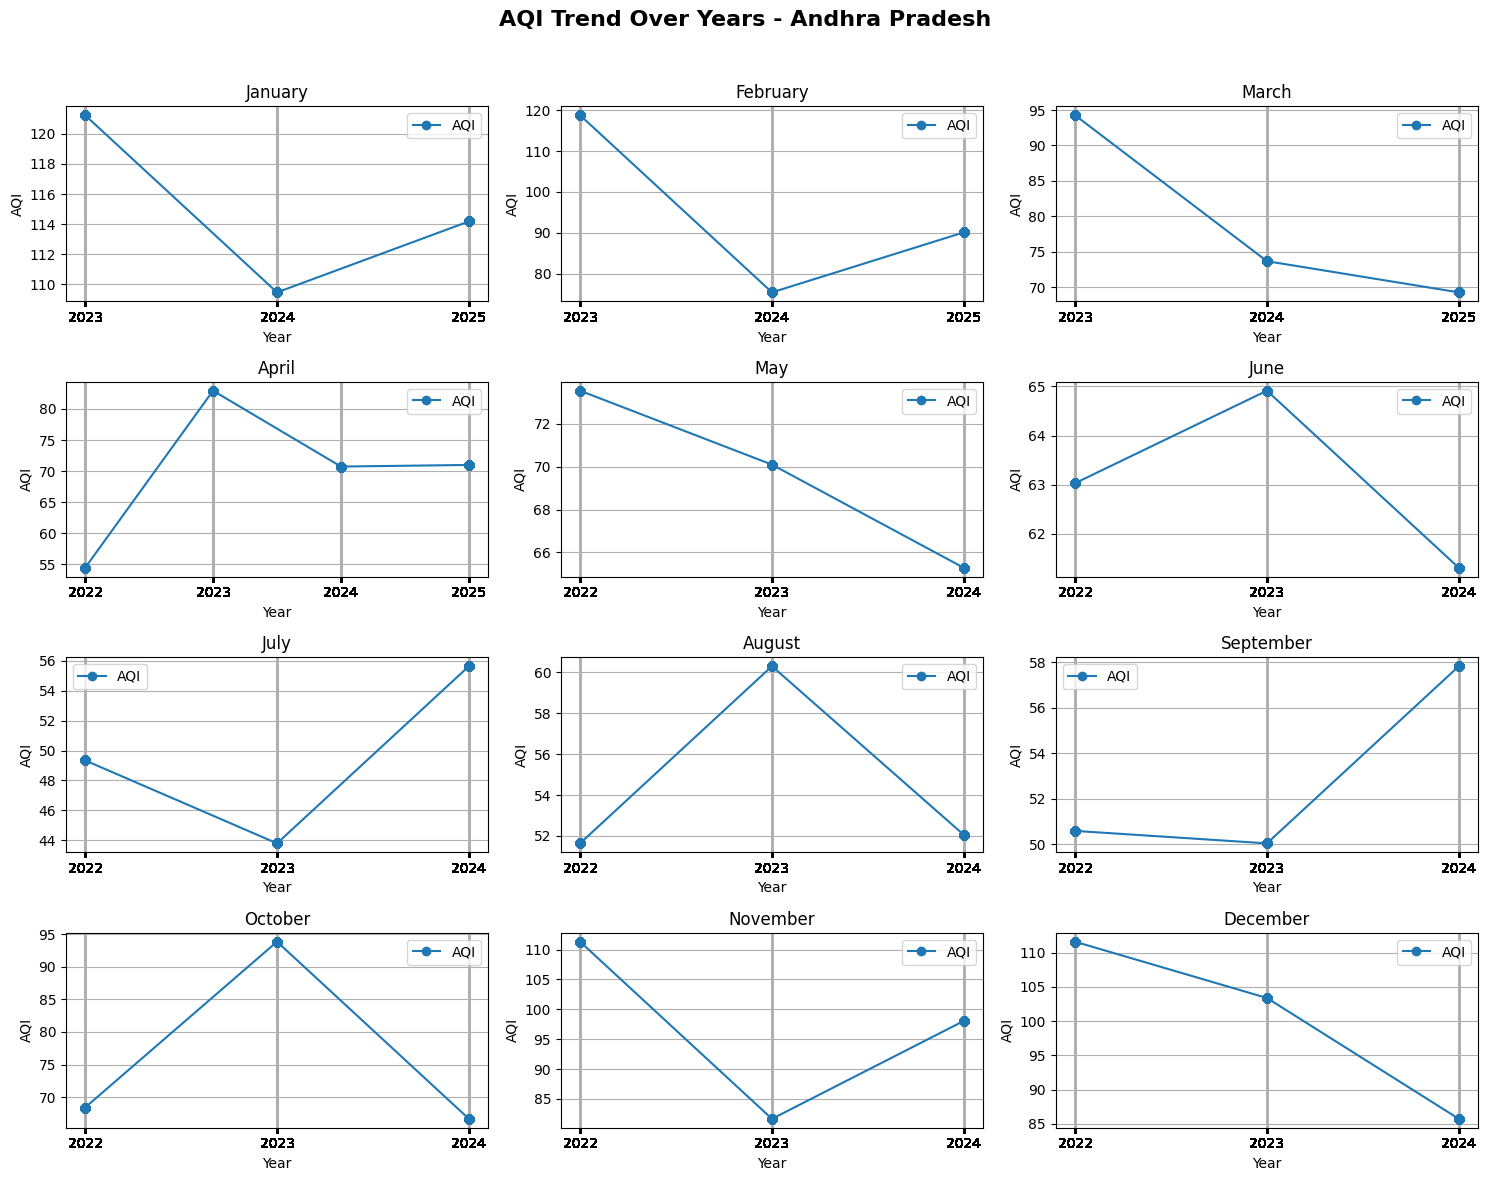

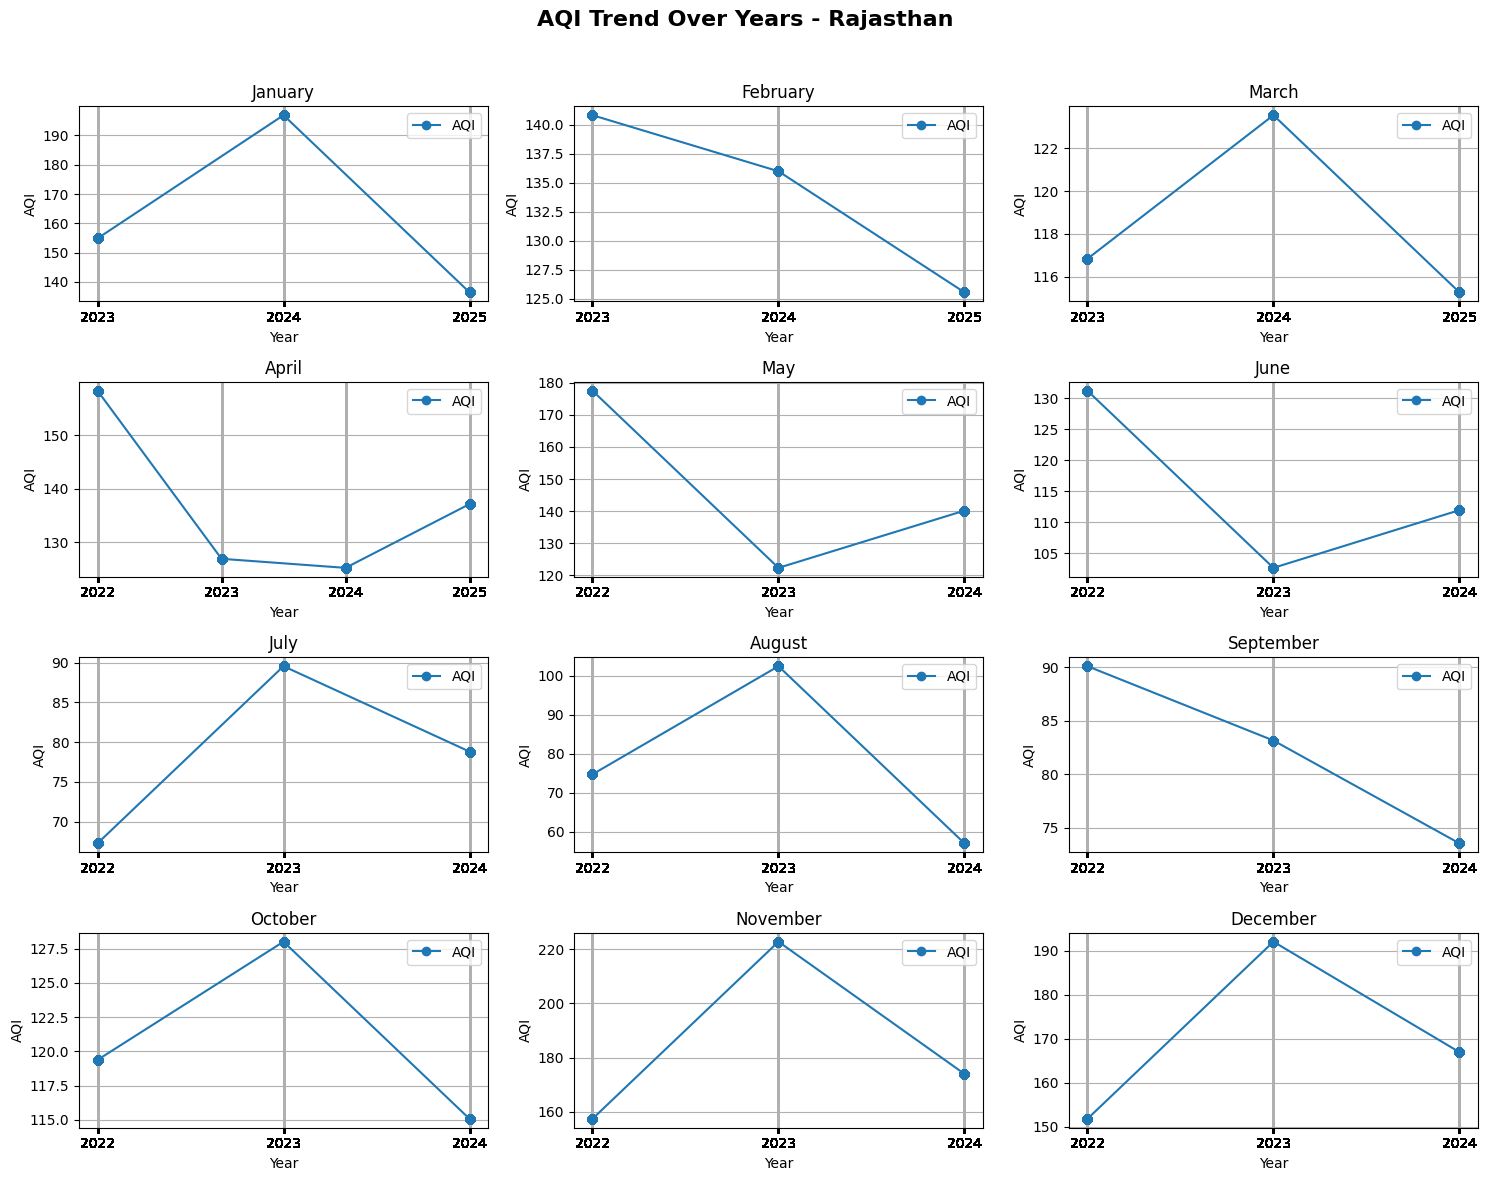

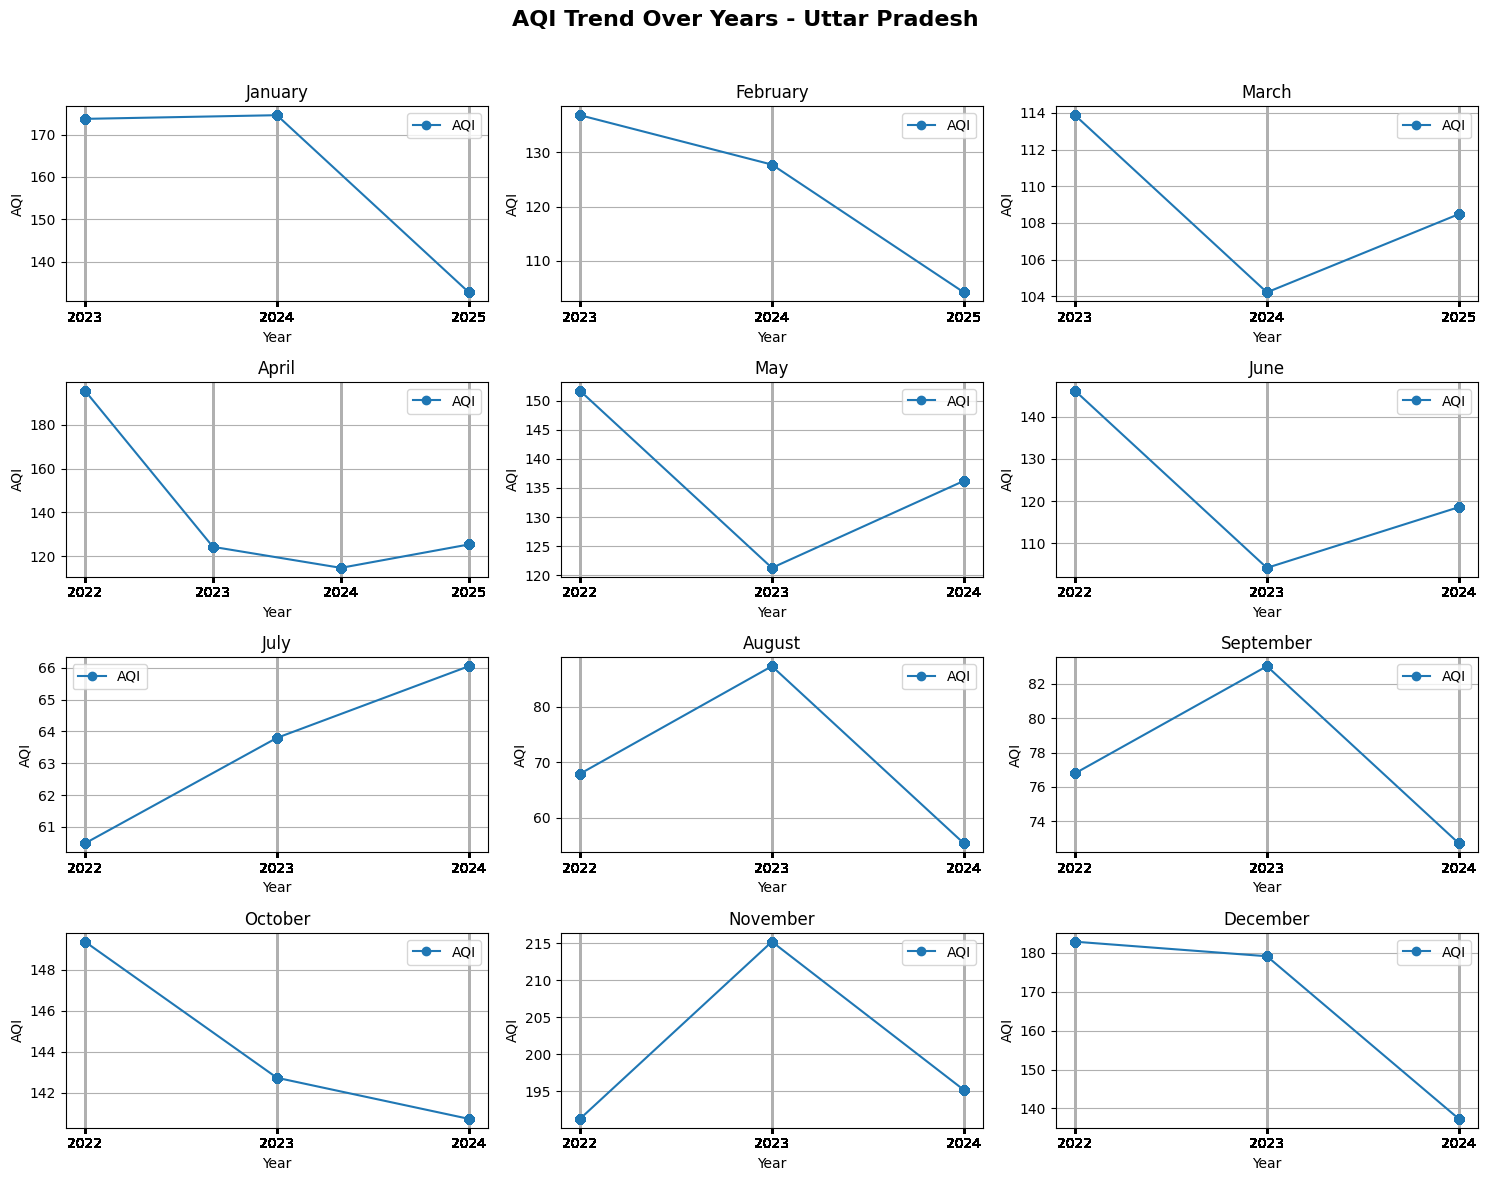

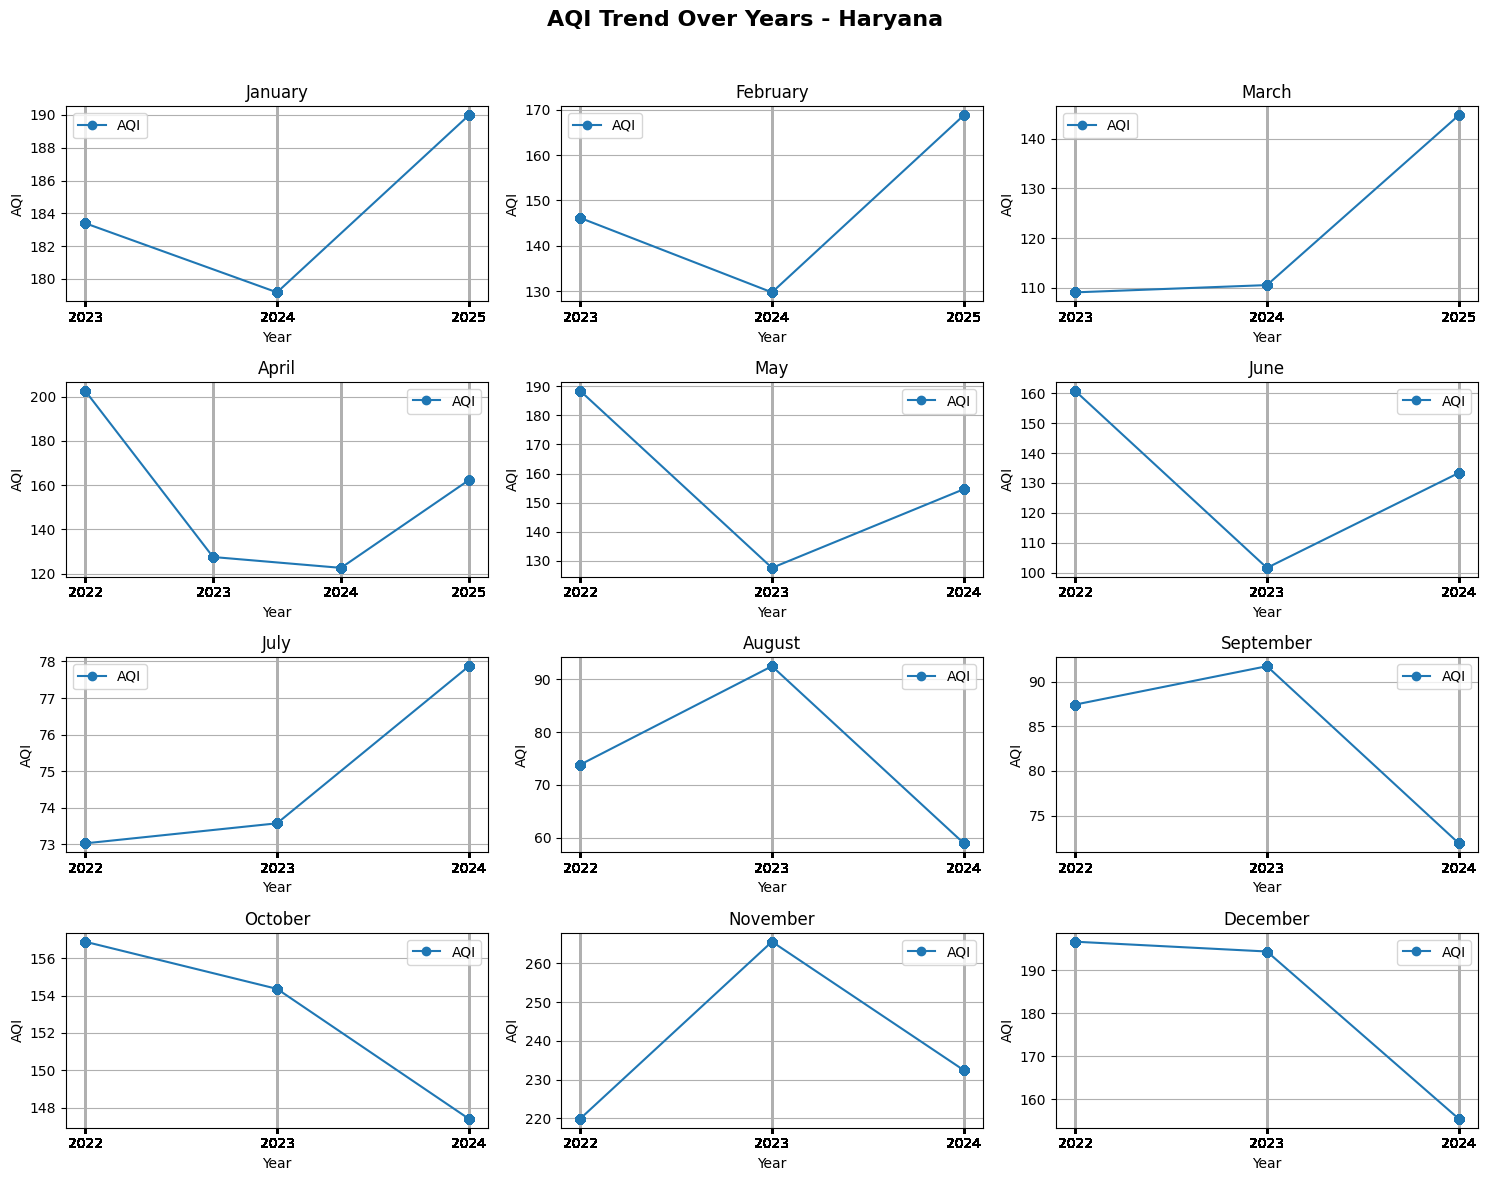

In [150]:
dfs = [
    df_aqi_jan, df_aqi_feb, df_aqi_mar, df_aqi_apr, df_aqi_may, df_aqi_jun, df_aqi_jul, 
    df_aqi_aug, df_aqi_sep, df_aqi_oct, df_aqi_nov, df_aqi_dec]
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

for state in top_states:
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # 3 columns → 3 graphs per row
    axes = axes.flatten()

    for idx, (df_month, month_name) in enumerate(zip(dfs, months)):
        # Filter for current state
        df_state = df_month[df_month['state'] == state].copy()

        # Add avg AQI column per year
        df_state['avg_aqi'] = df_state.groupby('year')['aqi_value'].transform('mean')

        # Plot on the correct subplot
        ax = axes[idx]
        ax.plot(df_state['year'], df_state['avg_aqi'], marker='o', label='AQI')
        ax.set_title(month_name)
        ax.set_xlabel('Year')
        ax.set_ylabel('AQI')
        ax.set_xticks(df_state['year'])
        ax.grid(True)
        ax.legend()

    # Remove unused subplots (if any)
    for extra_ax in axes[len(dfs):]:
        extra_ax.axis('off')

    fig.suptitle(f"AQI Trend Over Years - {state}", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

*Worst AQI Months - January, February, November, December*

**5. For the city of Bengaluru, how many days fell under each air quality category (e.g., Good, Moderate, Poor, etc.) between March and May 2025?**

In [34]:
df_aqi.air_quality_status.unique()

array(['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [35]:
df_aqi_bengaluru = df_aqi[(df_aqi.state == 'Karnataka') & (df_aqi.date >= '01-03-2025') & (df_aqi.date <= '31-05-2025')]

In [36]:
df_aqi_bengaluru.air_quality_status.unique()

array(['Good', 'Moderate', 'Satisfactory', 'Poor'], dtype=object)

In [37]:
df_aqi_bengaluru.groupby('air_quality_status')['date'].count()

air_quality_status
Good             685
Moderate         281
Poor              12
Satisfactory    1179
Name: date, dtype: int64

**6. List the top two most reported disease illnesses in each state over the past three years, along with the corresponding average Air Quality Index (AQI) for that period.**

In [38]:
df_aqi.groupby('year')['aqi_value'].mean().round(2)

year
2022    114.40
2023    115.02
2024    105.69
2025    112.40
Name: aqi_value, dtype: float64

In [39]:
df_idsp.columns

Index(['year', 'week', 'outbreak_starting_date', 'reporting_date', 'state',
       'district', 'disease_illness_name', 'status', 'cases', 'deaths', 'unit',
       'note'],
      dtype='object')

In [40]:
df_idsp_lst3yrs = df_idsp[(df_idsp.year >= 2023) & (df_idsp.year <= 2025)]

In [41]:
df_idsp_lst3yrs.columns

Index(['year', 'week', 'outbreak_starting_date', 'reporting_date', 'state',
       'district', 'disease_illness_name', 'status', 'cases', 'deaths', 'unit',
       'note'],
      dtype='object')

In [42]:
df_aqi_lst3yrs = df_aqi[(df_aqi.year >= 2023) & (df_aqi.year <= 2025)]

In [43]:
df_aqi_lst3yrs.shape

(192328, 12)

In [44]:
df_idsp_lst3yrs.shape

(5549, 12)

In [65]:
df_aqi_avg_lst3yrs = (
    df_aqi[
        (df_aqi.date >= '2023-01-01') & 
        (df_aqi.date <= '2025-12-31')
    ]
    .groupby('state', as_index=False)['aqi_value']
    .mean()
    .rename(columns={'state': 'state', 'aqi_value': 'avg_aqi'})
)

In [68]:
df_aqi_idsp_lst3yrs = pd.merge(df_idsp_lst3yrs, df_aqi_avg_lst3yrs, on = 'state')

In [72]:
print("\033[1mTop 2 most reported diseases (State wise)\033[0m")

print(df_aqi_idsp_lst3yrs.groupby(['state', 'disease_illness_name','avg_aqi'])['cases'].sum().reset_index().sort_values(['state', 'cases'],
                            ascending=[True, False]).groupby('state').head(2).to_string(index=False))

Top 2 most reported diseases (State wise)
                      state    disease_illness_name    avg_aqi  cases
Andaman and Nicobar Islands Acute Diarrheal Disease  57.706897     94
Andaman and Nicobar Islands         Fever with Rash  57.706897      8
             Andhra Pradesh Acute Diarrheal Disease  78.529013   3189
             Andhra Pradesh                 Cholera  78.529013   1081
          Arunachal Pradesh Acute Diarrheal Disease  55.961207    290
          Arunachal Pradesh                   Mumps  55.961207    133
                      Assam Acute Diarrheal Disease 116.733009   2683
                      Assam          Food Poisoning 116.733009   1791
                      Bihar Acute Diarrheal Disease 153.262618   1316
                      Bihar         Fever with Rash 153.262618    830
                 Chandigarh                 Cholera 145.118824     16
               Chhattisgarh Acute Diarrheal Disease  79.577185   7818
               Chhattisgarh                 Chol

**7. List the top 5 states with high EV adoption and analyse if their average AQI is significantly better compared to states with lower EV adoption**

In [49]:
df_vahan.head()

year  month                        state                       rto  \
0  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
1  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
2  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
3  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
4  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   

     vehicle_class           fuel  value                      unit  note  
0              BUS         DIESEL      2  value in Absolute Number   NaN  
1    GOODS CARRIER         DIESEL     23  value in Absolute Number   NaN  
2    GOODS CARRIER         PETROL      1  value in Absolute Number   NaN  
3  M-CYCLE/SCOOTER  ELECTRIC(BOV)      1  value in Absolute Number   NaN  
4  M-CYCLE/SCOOTER         PETROL    387  value in Absolute Number   NaN

In [50]:
df_vahan.fuel.value_counts()

fuel
DIESEL                22961
PETROL                12951
ELECTRIC(BOV)          8691
CNG ONLY               4651
PETROL/CNG             3760
PETROL/HYBRID          2959
PURE EV                2251
PETROL/ETHANOL         1820
NOT APPLICABLE         1577
STRONG HYBRID EV        943
DIESEL/HYBRID           868
PETROL/LPG              663
LPG ONLY                492
ETHANOL                 118
LNG                      76
PLUG-IN HYBRID EV        45
FUEL CELL HYDROGEN        8
DUAL DIESEL/LNG           4
DUAL DIESEL/CNG           2
SOLAR                     1
Name: count, dtype: int64

In [51]:
fully_ev = ['ELECTRIC(BOV)', 'PURE EV']
half_ev = ['STRONG HYBRID EV', 'PLUG-IN HYBRID EV', 'FUEL CELL HYDROGEN']
no_ev = [
    "DIESEL",
    "PETROL",
    "CNG ONLY",
    "PETROL/CNG",
    "PETROL/HYBRID",      
    "PETROL/ETHANOL",
    "NOT APPLICABLE",
    "DIESEL/HYBRID",      
    "PETROL/LPG",
    "LPG ONLY",
    "ETHANOL",
    "LNG",
    "DUAL DIESEL/LNG",
    "DUAL DIESEL/CNG",
    "SOLAR"              
]

In [52]:
def fuel_to_ev_type(fuel):
    if fuel in fully_ev:
        return 'fully_ev'
    elif fuel in half_ev:
        return 'half_ev'
    else:
        return 'no_ev'

In [53]:
df_vahan['ev_type'] = df_vahan.fuel.apply(lambda x: fuel_to_ev_type(x))

In [54]:
df_vahan.head()

year  month                        state                       rto  \
0  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
1  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
2  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
3  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   
4  2025  April  Andaman and Nicobar Islands  All Vahan Running Office   

     vehicle_class           fuel  value                      unit  note  \
0              BUS         DIESEL      2  value in Absolute Number   NaN   
1    GOODS CARRIER         DIESEL     23  value in Absolute Number   NaN   
2    GOODS CARRIER         PETROL      1  value in Absolute Number   NaN   
3  M-CYCLE/SCOOTER  ELECTRIC(BOV)      1  value in Absolute Number   NaN   
4  M-CYCLE/SCOOTER         PETROL    387  value in Absolute Number   NaN   

    ev_type  
0     no_ev  
1     no_ev  
2     no_ev  
3  fully_ev  
4     no_ev

In [55]:
states_to_exclude = set(df_vahan.state.unique()) - set(df_aqi.state.unique())

In [56]:
states_to_exclude

{'Dadra and Nagar Haveli', 'Goa', 'Ladakh', 'Lakshadweep'}

In [57]:
print("\033[1mTop 10 states with high EV adoption\033[0m")

df_vahan[['state','ev_type','value']][(df_vahan.ev_type == 'fully_ev') & (~df_vahan.state.isin(states_to_exclude))].groupby(['ev_type','state'])['value'].sum().sort_values(ascending=False).head(10)

Top 10 states with high EV adoption


ev_type   state         
fully_ev  Uttar Pradesh     908934
          Maharashtra       636611
          Karnataka         470810
          Tamil Nadu        323064
          Rajasthan         302766
          Bihar             280499
          Gujarat           244046
          Delhi             238183
          Madhya Pradesh    237361
          Kerala            221561
Name: value, dtype: int64

In [58]:
df_aqi.columns

Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note', 'day', 'day_type', 'year'],
      dtype='object')

In [59]:
top5_ev_states = ['Uttar Pradesh',   
          'Maharashtra',     
          'Karnataka',      
          'Tamil Nadu',     
          'Rajasthan']
next5_ev_states = ['Bihar',         
          'Gujarat',         
          'Delhi',             
          'Madhya Pradesh',    
          'Kerala']

In [60]:
df_states_avg_aqi = pd.DataFrame(df_aqi[['state','aqi_value']].groupby('state')['aqi_value'].mean().reset_index())

In [62]:
print("\033[1mTop 5 states with high EV adoption - Average AQI\033[0m")

df_top5_states_ev_avgaqi = df_states_avg_aqi[df_states_avg_aqi.state.isin(top5_ev_states)]
df_top5_states_ev_avgaqi['status'] = 'High EV'
df_top5_states_ev_avgaqi

Top 5 states with high EV adoption - Average AQI


state   aqi_value   status
13      Karnataka   62.672853  High EV
16    Maharashtra  103.639833  High EV
24      Rajasthan  127.987248  High EV
26     Tamil Nadu   67.757654  High EV
29  Uttar Pradesh  126.424036  High EV

In [63]:
print("\033[1mNext 5 states with high EV adoption - Average AQI\033[0m")

df_next5_states_ev_avgaqi = df_states_avg_aqi[df_states_avg_aqi.state.isin(next5_ev_states)]
df_next5_states_ev_avgaqi['status'] = 'Lesser EV'
df_next5_states_ev_avgaqi

Next 5 states with high EV adoption - Average AQI


state   aqi_value     status
4            Bihar  157.158122  Lesser EV
7            Delhi  206.416889  Lesser EV
8          Gujarat  110.634272  Lesser EV
14          Kerala   68.070147  Lesser EV
15  Madhya Pradesh  108.716483  Lesser EV

In [64]:
df_comparison_states = pd.concat([df_top5_states_ev_avgaqi,df_next5_states_ev_avgaqi],axis=0)

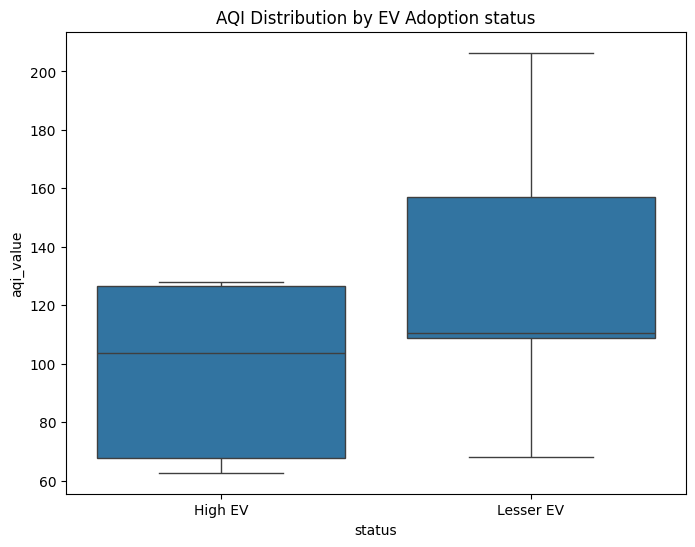

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_comparison_states, x='status', y='aqi_value')
plt.title('AQI Distribution by EV Adoption status')
plt.show()

*Yes, the average AQI of states with high EV adoption is significantly better than those with lower EV adoption.*

**<center>SECONDARY ANALYSIS</center>**

**1. Which age group is most affected by air pollution-related health outcomes — and how does this vary by city?**


*Using External Data*

*1. The Economic Times - https://economictimes.indiatimes.com/news/india/air-pollution-in-indian-districts-significantly-increased-death-risk-across-age-groups-study-finds/articleshow/112832226.cms*

- Air pollution related health outcomes affect newborns by 86 percent, children under five years of age by 100-120 percent and adults by 13 per cent 

*2. UN environment Program - https://www.unep.org/news-and-stories/blogpost/young-and-old-air-pollution-affects-most-vulnerable*

- Air pollution is found to increase the risk of certain diseases, such as lung cancer, heart disease and acute respiratory infections, notes the World Health Organization. While this impacts people of all ages, babies and young children are more at risk.

*3. Science Direct - https://www.sciencedirect.com/science/article/pii/S0301420723012680*

- Due to the advances of Urbanization, cities are increasingly becoming interconnected with the improvement of the infrastructure in terms of communication between metropolitan areas. There has been a severe increase in air pollution due to Urbanization

*4. Health Policy Watch - https://healthpolicy-watch.news/even-indias-cleanest-cities-have-significant-excess-air-pollution-related-deaths/*

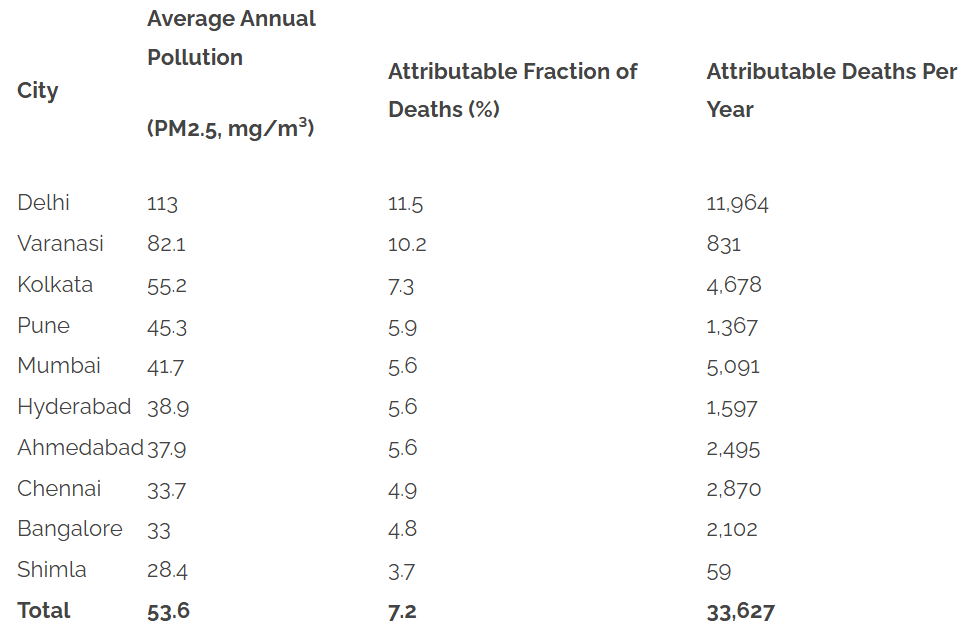

*Shimla proves that there is no safe level of air pollution, according to the report. It has the lowest air pollution level of  the 10 cities, yet that was still a risk as 3.7% of all deaths were attributable to short-term PM 2.5 exposure.*

**2. Who are the major competitors in the Indian air purifier market, and what are their key differentiators (e.g., price, filtration stages, smart features)?**

*Using External Data*

*Data Source: https://www.amazon.in/gp/bestsellers/kitchen/5403404031*

*Top 2:*

*1) Dr. CHARCOAL Activated Carbon Air Purifier Bag*

*Price: Rs 589*

*Filtration Stages:*

*This air purifier bag utilizes 100% activated charcoal derived from coconut shells. The charcoal's surface contains micropores with sizes less than 2 nanometers, functioning similarly to a sponge to absorb:*

*Odors: Eliminates unpleasant smells without masking them with artificial fragrances.*

*Moisture: Absorbs excess humidity, helping to prevent mold and mildew.*

*Bacteria and Allergens: Traps airborne pollutants and allergens, contributing to cleaner air.*

*Features:*

*LASTS OVER 1 YEAR: Dr Charcoal's non-electric air purifier lasts for more than a year and it is very cost-effective.
100%*

*NATURAL: Synthetic sprays and plugins use formaldehyde and other toxic chemicals whereas Dr Charcoal's non-electric air purifier uses 100% activated charcoal.*

*BREATHE FRESH AIR: Dr Charcoal's non-electric air purifier helps in air purification and helps to breathe fresh air.*

*NO ELECTRICITY REQUIRED: These air purifiers typically do not require any electricity or special setup, making them easy to use right out of the box.*

*CAR AIR PURIFIER: It can be used as a car air purifier, effectively removing odours and impurities from the air inside your car.
100%* 

*ACTIVATED CHARCOAL: Dr Charcoal's non-electric air purifier uses high quality coconut shell activated carbon to trap impurities and eliminate odours.*

*2) Coway Airmega 150 (AP-1019C) Air Purifier*

*Price: Rs 17998*

*Filtration Stages:*

*3-Stage Filtration Process*

*I - Pre-Filter (PM10 Particles)*

*Function: Captures larger particles such as dust, hair, and pet dander.* 

*Maintenance: Washable and reusable; should be cleaned regularly to maintain optimal airflow.*

*II - Activated Carbon Filter (Deodorization)*

*Function: Absorbs and neutralizes odors, volatile organic compounds (VOCs), and harmful gases like formaldehyde and benzene.*

*Features: Patented urethane-based activated carbon filter with a lifespan of approximately 8,500 hours (1.5–2 years).*

*III - Green True HEPA Filter (H13 Grade)*

*Function: Traps fine particles as small as 0.01 microns, including allergens, viruses, bacteria, and fine dust.*

*Efficiency: Provides 99.999% filtration efficiency, effectively eliminating airborne pollutants.*

*Features:*

*WORLD LEADER IN AIR CARE: Coway is a trusted South Korean brand renowned for its innovative air purifiers. With the world’s largest R&D center in Air Care, Coway delivers superior air purifiers with most advanced technology for air purification.*

*SPECIAL ANTI-VIRUS GREEN TRUE HEPA FILTER: Coway's Patented Anti-Virus Hepa Filter not only captures allergies, viruses, germs, bacteria, PM2.5 Particles but also kills them with 99.99% efficiency, ensuring extra protection to your family with effective purification.*

*3-STAGE AIR PURIFICATION: Features a Pre-Filter for PM10 particles, a Patented Urethane Carbon Filter for removing bad odor, foul smell, hazardous gases (VOCs, formaldehyde), cooking smell, and a Multi-Layered Anti-Virus True HEPA Filter that captures PM2.5 particles and eliminates viruses and allergens up to 0.001 microns.*

*REAL-TIME AIR QUALITY MONITORING: Equipped with an air quality sensor that displays air quality through a 4-color LED lamp, helping users make informed decisions about the purifier's mode.*

*LONGEST FILTER LIFE: The Coway HEPA Filter boasts a thickness of 25 mm and offers longest filter life of 8,500 hours of usage. Saves your replacement cost by 2.5 times.*

*SMART AUTO MODE: Automatically detects air quality and adjusts fan speed accordingly, optimizing power consumption for effortless operation.*

*USER-FRIENDLY SPECIAL CARTRIDGE FILTERS: One-touch filter removal allows for easy cleaning and replacement without dirtying your hands, enhancing user convenience. SUITABLE FOR INDIAN ROOMS: Effective for rooms up to 355 sq. ft (33 sq. m) like Living Room, King/Queen Size Bedroom, Kitchen etc.*

*SUPER SILENT PURIFICATION: With noise levels ranging from 22 to 49 dB, this air purifier operates quietly, allowing you to enjoy clean air without disruptive sounds, making it perfect for bedrooms and workspaces.*

*LONGEST WARRANTY: Coway Air Purifiers comes with 5 years warranty on motor & 1 year electrical parts, providing users with peace of mind regarding the product's durability. Register your warranty and extended your warranty on motor by 2 more years (Total 7 years after registration).*

*DOOR STEP SERVICES: With over 90 dedicated offices across India, Coway provides door-step service for all users. We offer free installation and home service, ensuring customer needs are prioritized. Simply reach out via our toll-free number for assistance with demonstrations and any service requirements.*

**3. What is the relationship between a city’s population size and its average AQI — do larger cities always suffer from worse air quality? (Consider 2024 population and AQI data for this)**


*Using External Data*

*Data Sources:*

*1) Adda 247 - https://currentaffairs.adda247.com/recap-2024-most-populated-indian-cities-in-2024/*

*2) India Today - https://www.indiatoday.in/information/story/indias-least-polluted-cities-2617719-2024-10-16*

*3) The Times of India - https://timesofindia.indiatimes.com/etimes/trending/indian-cities-with-least-amount-of-air-pollution/amp_etphotostory/114517393.cms* 

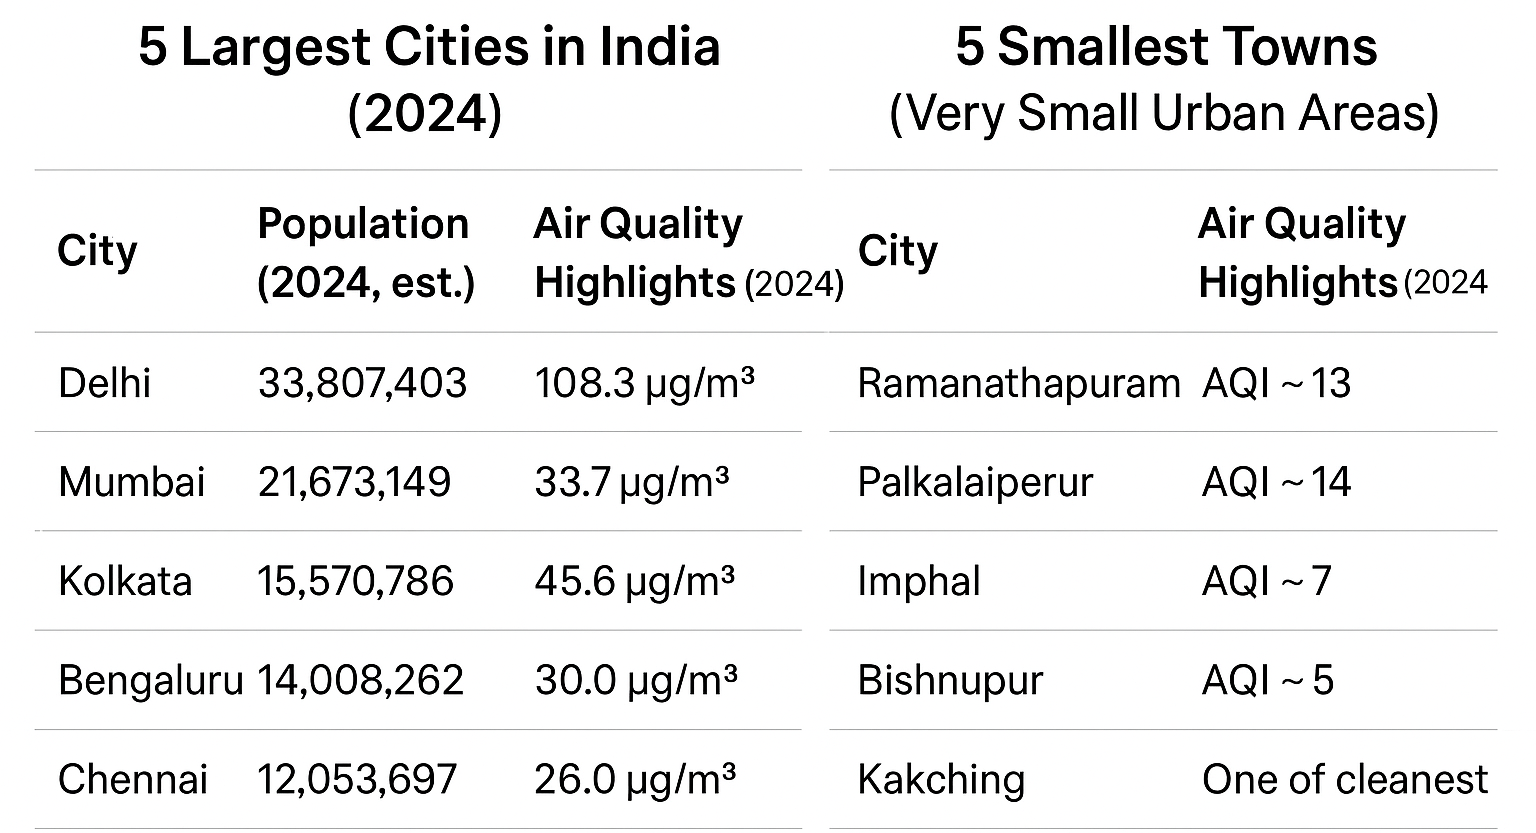

*The population of 'very small urban towns' is less than 100,000*

**4. How aware are Indian citizens of what AQI (Air Quality Index) means — and do they understand its health implications?**


*Using External Data*

*Data Sources:*

*1) Ministry of Environment - https://www.pib.gov.in/PressReleaseIframePage.aspx?PRID=2003998&*

*2) Reddit - https://www.reddit.com/r/delhi/comments/1gxyxl4/delhi_pollution_nobody_cares_i_know_a_way_to_make/*

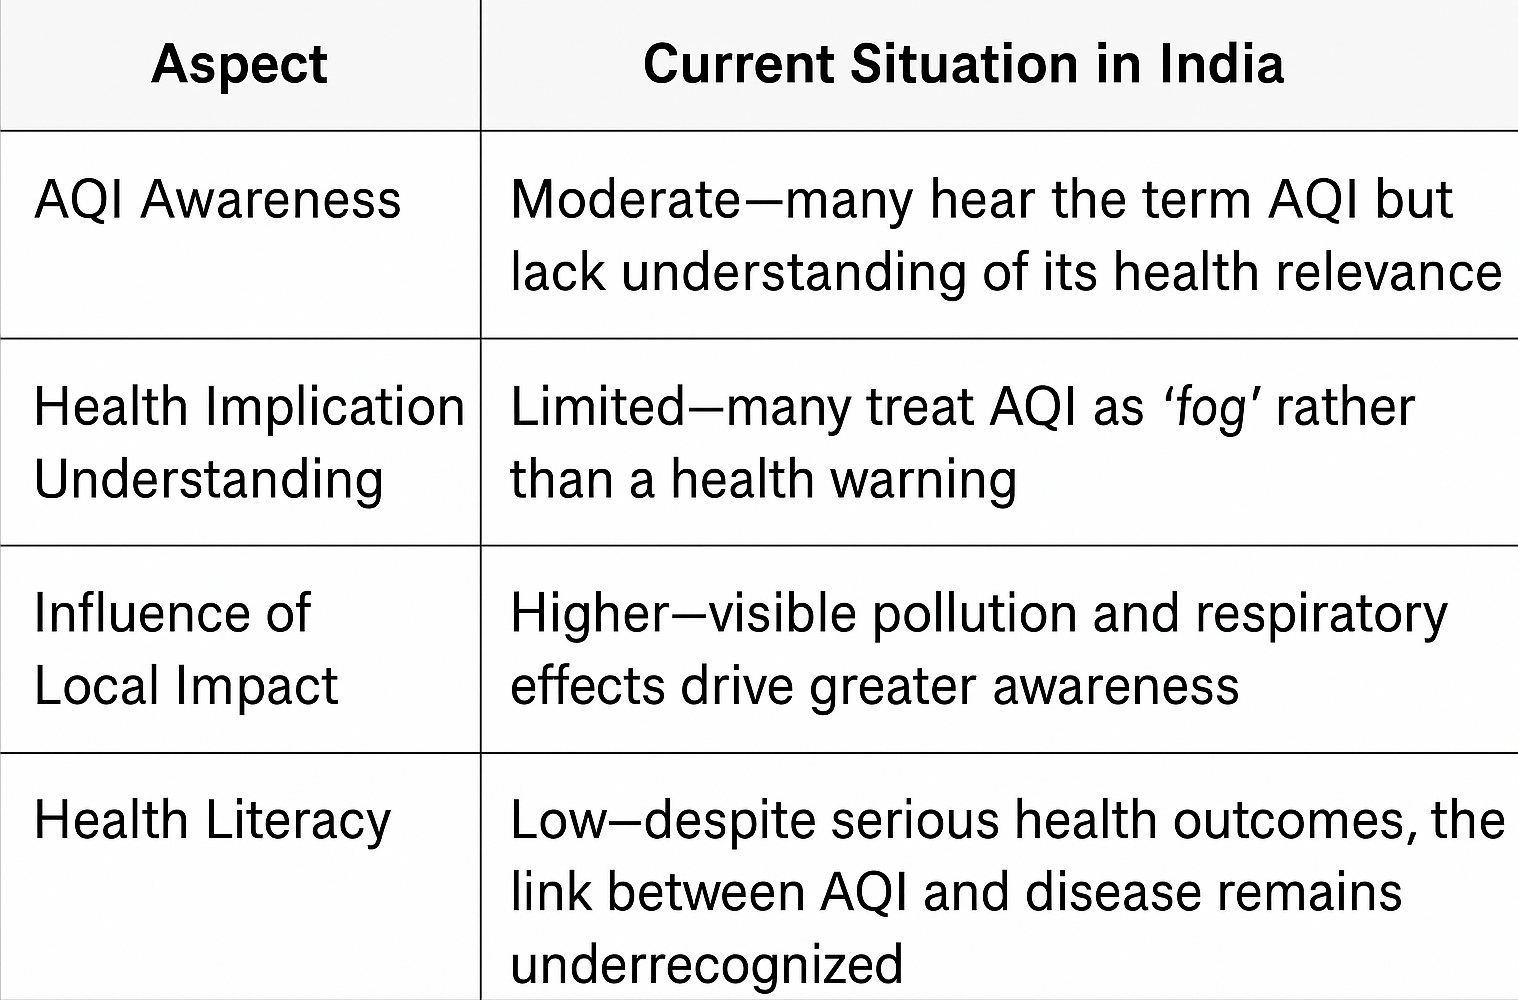

**5. Which pollution control policies introduced by the Indian government in the past 5 years have had the most measurable impact on improving air quality — and how have these impacts varied across regions or cities?**

*Using External Data*

*Data Sources:*

*1) The Times of India - https://timesofindia.indiatimes.com/city/gurgaon/why-is-faridabad-choking-60-of-funds-allocated-to-curb-pollution-unused/articleshow/123103448.cms*

*2) Science Direct - https://www.sciencedirect.com/science/article/abs/pii/S2211464523000039*

*3) The Indian Express - https://indianexpress.com/article/cities/delhi/firecracker-ban-reduce-nanoparticle-emissions-study-9623488/*

*4) The Council - https://www.ceew.in/publications/delhi-winter-pollution-2021-case-study-on-air-quality-management*

*5) WRI India - https://wri-india.org/perspectives/delhis-air-quality-needs-data-driven-action*

*6) Progress Report on NCAP - https://energyandcleanair.org/wp/wp-content/uploads/2024/01/Tracing-the-Hazy-Air-2024-Progress-Report-on-National-Clean-Air-Programme-NCAP.pdf*

**1) Bharat Stage VI fuel & vehicle emission standards (BS-VI) — nationwide rollout (2020)**

*What: Shift from BS-IV to BS-VI fuel and vehicle emission standards for on-road vehicles.*

*Measurable impact: Studies show reductions in vehicle emissions (CO, NMVOC, organic carbon, black carbon) after BS upgrades — measurable drops in key pollutants attributable to vehicular policy changes.*

*Regional variation: Biggest benefits in metro cities with heavy traffic (Delhi, Mumbai, Bengaluru) where vehicular share of PM and NOx is high; smaller improvements where stationary/biomass sources dominate.*

**2) National Clean Air Programme (NCAP) — implementation & funding (2019 → ongoing, intensified last 5 years)**

*What: Central programme targeting 131 “non-attainment” cities with city-level action plans, source apportionment studies, investments in dust control, monitoring, and sectoral measures.*

*Measurable impact: Aggregate analyses and progress reports find reductions in PM10/PM2.5 in many target cities (some cities show substantial drops while others lag); peer-reviewed and NGO progress analyses indicate NCAP helped reduce PM10 in multiple cities but outcomes are uneven. *

*Regional variation: Mumbai and Kolkata showed bigger reductions (reports cite ~44% and ~37% reductions in some metrics), while cities like Delhi and some NCR satellites / industrial towns show smaller or inconsistent declines — under-utilisation of NCAP funds in some localities (example: Faridabad).*

**3) Graded Response Action Plan (GRAP) and emergency interventions (winter smog response; CAQM directions since 2020–22)**

*What: Triggered, tiered actions when AQI crosses thresholds (e.g., construction bans, odd-even trials, restrictions on diesel generators, restrictions on trucks, dust control).*

*Measurable impact: GRAP and emergency measures produce short-term reductions during triggered windows (e.g., enforcement days in winter see lower concentrations vs. counterfactuals), and help avoid extreme spikes when implemented and enforced. Case studies of Delhi winters show that timely GRAP actions reduce near-term peaks.*

*Regional variation: Most relevant in Delhi NCR and other metro regions that have GRAP frameworks; less applicable in cities that don’t implement/coordinate cross-jurisdictionally.*

**4) Restrictions on fireworks / Diwali firecracker bans or limits**

*What: Local bans or restrictions around Diwali in several cities; public messaging and enforcement in some years (2021–2023).*

*Measurable impact: Studies show Diwali firecracker bans or stricter enforcement reduce nanoparticle and PM spikes by ~20–25% on those festival days (and shorten high-pollution episodes), though long-term annual averages are less affected.*

*Regional variation: Impact largest in cities where Diwali firecracker use was previously intense (Delhi, many north Indian cities); negligible in places without large firecracker emissions.*

**5) Vehicle-sector policies beyond BS-VI: EV promotion, scrappage policy, heavy-duty vehicle measures**

*What: Faster EV adoption incentives, vehicle scrappage scheme to remove old polluting vehicles, stricter norms for heavy-duty vehicles.*

*Measurable impact: Modeling and sectoral studies predict and observe reductions in NOx/PM from heavy vehicles and slower growth (or declines) in traffic-related emissions where EV uptake or scrappage is meaningful; measurable gains are emerging but are gradual.*

*Regional variation: Stronger effect in cities with higher EV sales and active scrappage uptake (metros, Tier-1 cities), limited where uptake is slow.*

**6) Local dust control, construction controls, and small-scale industrial measures (often NCAP/municipal)**

*What: Road-paving, sprinklers, mechanical sweeping, tighter construction site controls, C&D waste rules.*

*Measurable impact: For cities that invested NCAP funds in dust control, visible short-term PM10 reductions (useful in arid or construction-intense cities), but unless paired with industrial and regional agricultural measures, gains can be modest. Example: Faridabad reported partial PM10 reductions but still well above standards.*

**<center>CRITICAL QUESTIONS</center>**

**1. Priority Cities: Which Tier 1/2 cities show irreversible AQI degradation?**

*Data Sources:*

*1) PubMed Central - https://pmc.ncbi.nlm.nih.gov/articles/PMC7417276/*

*2) Centre for Science and Environment - https://www.cseindia.org/cse-releases-2024-25-winter-air-pollution-analysis-for-six-megacities-of-india-12641*

*3) The Guardian - https://www.theguardian.com/world/2024/nov/22/the-air-is-killing-us-why-delhi-india-pollution-problem-runs-deeper-than-smog-season*

**Delhi**

*Although PM₂.₅ has dropped ~4.19 µg/m³/yr (≈3.7 % per year) during 2014–19 , winter peaks (e.g., 602 µg/m³ in Nov 2024) are worse than in prior years, indicating a rising baseline*

**Kolkata**

*Limited or stagnant gains: winter peaks remain high (~135 µg/m³ in 2024) with minimal improvement over past years*

**Mumbai**

*Despite a declining PM₂.₅ trend (~1.79 µg/m³/year) from 2014–19 , consistent hotspots persist in key zones suggesting pockets of chronic degradation.*

**Bangaluru**

*Sharp winter peaks and repeated winter ‘very poor’ AQI days, with worsening winter trends across 2019–23; long-term trends from 2014–19 show modest PM₂.₅ declines*

**Hyderabad/Chennai**

*Both cities show steady PM₂.₅ declines (~1.5–2.6 µg/m³/year), with winter peak reductions: Hyderabad (–51%), Chennai (–19%) in 2024 vs previous years*

**2. Health Burden: How do AQI spikes correlate with pediatric asthma admissions?**

*Data Sources:*

*1) National Library of Medicine: https://pubmed.ncbi.nlm.nih.gov/37628320/*

*2) Springer Nature - https://link.springer.com/article/10.4209/aaqr.220038*

*3) The Times of India - https://timesofindia.indiatimes.com/city/bengaluru/asthma-cases-surge-thanks-to-poor-air-quality-late-diagnosis/articleshow/120905786.cms*

*4) The Indian Express - https://indianexpress.com/article/cities/delhi/asthma-cases-surge-among-children-in-delhi-doctors-say-pollution-to-blame-8252554/*

*5) Reuters - https://www.reuters.com/world/india/toxic-smog-wreathes-indias-capital-winter-nears-2024-11-05/*

*6) The Lancet - https://www.thelancet.com/journals/lansea/article/PIIS2772-3682%2823%2900188-9/fulltext*

**Mysore**

*+10 µg/m³ NO₂ - +2.42% increase in asthma admissions*

*PM₁₀ - Linear rise in admissions*

**Ahmedabad**

*Seasonal PM₂.₅ spikes - RR of 1.08–1.16; ~25–45 extra admissions per 100k children*

**Bengaluru**

*Construction dust, traffic - +25% child asthma cases; +15% hospitalizations*

**Delhi**

*Winter smog peaks - Doctor-reported doubling of asthma admissions*

**India-wide**

*High ambient PM₂.₅ - Persistent child respiratory morbidity—even below national standards*

**3. Behavior Shifts: Do pollution emergencies increase purifier searches/purchases?**

*Data Sources:*

*1) Business Standard - https://www.business-standard.com/india-news/air-purifier-and-mask-sales-surge-as-delhi-ncr-battles-severe-air-pollution-124111800836_1.html*

*2) The Times of India - https://timesofindia.indiatimes.com/india/delhi-sees-surge-in-sale-of-air-purifiers-masks-as-pollution-levels-worsen/articleshow/114468072.cms*

*3) The Economic Times - https://economictimes.indiatimes.com/news/india/air-purifier-mask-sales-up-as-delhi-ncr-grapples-with-severe-air-pollution/articleshow/115418522.cms*

*4) The Hindu - https://www.thehindu.com/sci-tech/energy-and-environment/why-there-is-a-high-demand-for-air-monitoring-devices-in-india/article25334876.ece*

*5) Reddit - https://www.reddit.com/r/delhi/comments/17l6pi8/air_purifiers_the_new_air_conditioners_the/*

**Evidence of Demand Spikes During Pollution Emergencies**

*Delhi-NCR Sales Double*

When air quality deteriorated to severe or severe plus levels, dealers reported daily sales of air purifiers doubling — from around 20 units to 40 per day. Inquiries also surged to 150 per day. 

Another report logged a 70% increase in sales in Delhi, with many stores noting a 200% rise in purifier purchases at workplaces. Masks and pediatric inhalers also saw a sharp uptick. 

*Industry & Research Validation*

In Q3 2023, air purifier shipments in India rose a staggering 64% compared to Q3 2022, driven by heightened concerns over indoor air quality during pollution surges. 

Business Standard reported similar trends: purifier sales jump up to 50% when AQI tips into dangerous ranges, especially in and around Delhi-NCR. 

*Historical Patterns & Expanding Demand*

Sales trends during smog seasons and after Diwali show repeat patterns of heightened demand, often backed by manufacturer reports of up to 50% seasonal spikes. 

Prior coverage noted a steady rise in demand for air quality monitors and purifiers starting around 2016–17, particularly during Delhi’s post-Diwali smog episodes. 

*Public Sentiment (Reddit Posts)*

Delhi city-dwellers describe owning air purifiers becoming as common as air conditioners — a "coping mechanism" as pollution peaks. 

**4. Feature Gap: What do existing products lack (e.g., smart AQI syncing, compact designs)?**

*Data Sources:*

*1) Amazon - https://www.amazon.in/smart-air-purifier/s?k=smart+air+purifier*

*2) Flipkart - https://www.flipkart.com/smart-air-purifiers/pr?q=fklpmk&sid=j9e%2Cabm%2C3o4&*

*Features:*

*1) Real-time AQI display - Present in Philips AC4221 and Xiaomi models, rare overall; Not a standard: most lack indoor/outdoor AQI sync*

*2) Smart/App Connectivity - Available in Xiaomi, Electrolux, some premium models; Not widespread across mid-tier brands*

*3) Compact Designs - Limited—mainly standard room-sized units; portable options exist but uncommon; Few truly portable options fit small urban spaces*

*4) Battery Backup - Absent in listings; Not offered yet, even in 'smart' models*

*5) VOC/Gas Sensors - Some (Electrolux mention VOC), but most focus only on PM; Multi-pollutant sensing still uncommon*